# Neural networks from scratch with Kotlin

In this notebook, I will demonstrate the inner workings of neural network training. We will start with a blank Jupyter notebook and, by the end, we will have defined and trained a neural network. You will gain an intuitive understanding of how everything operates behind the scenes. Specifically, we will build kGrad, a library I released on GitHub, to illustrate these concepts.

### Introduction to kGrad
Let's start by understanding what kGrad is and why it’s interesting. kGrad is essentially an automatic differentation engine. It implements backpropagation, an algorithm that efficiently evaluates the gradient of a loss function with respect to the weights of a neural network. This process allows us to iteratively adjust the weights to minimize the loss function, thereby improving the network's accuracy. Backpropagation is the mathematical core of any modern deep neural network library, such as PyTorch or JAX.

### Explanation of computing derivatives for functions with a single input.

So now let's dive right in and implement kGrad step by step. The first thing I want to do is ensure that you have a solid, intuitive understanding of what a derivative is and the information it provides.

Let's define a scalar-valued function 𝑓(𝑥). We'll create a function that takes a single scalar 𝑥 and returns a single scalar. For example, let's define the function as follows:

$$
  f(x) = 3*x^2 -4*x + 5
$$

I just made this function up randomly. Next, let's define the function in Kotlin:

In [1]:
fun f(x: Double) = 3*x.pow(2) - 4*x + 5

And of course, we can call this function. For instance, we can pass in 3.0 and expect to get 20 back.

In [2]:
f(3.0)

20.0

Now, let's plot this function to get a sense of its shape. You can tell from the mathematical expression that this is probably a parabola, as it's a quadratic function. So, we'll create a set of scalar values that we can feed into the function. We can do this by generating values using a range from -5 to 5 in steps of 0.25.

In [3]:
val xAxis = (-20 .. 20).map { it / 4.0 }
xAxis

[-5.0, -4.75, -4.5, -4.25, -4.0, -3.75, -3.5, -3.25, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]

If we call 𝑓(𝑥) on these x-axis values, the y-values are essentially applying the function to each of these elements independently.

In [4]:
val yAxis = xAxis.map{ f(it) }
yAxis

[100.0, 91.6875, 83.75, 76.1875, 69.0, 62.1875, 55.75, 49.6875, 44.0, 38.6875, 33.75, 29.1875, 25.0, 21.1875, 17.75, 14.6875, 12.0, 9.6875, 7.75, 6.1875, 5.0, 4.1875, 3.75, 3.6875, 4.0, 4.6875, 5.75, 7.1875, 9.0, 11.1875, 13.75, 16.6875, 20.0, 23.6875, 27.75, 32.1875, 37.0, 42.1875, 47.75, 53.6875, 60.0]

Now, we can plot this using the Kandy library.

In [5]:
%use kandy

In [6]:
plot {
    line {
        x(xAxis)
        y(yAxis)
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.2.0/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="dFh5zr"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y"
},
"stat":"identity",
"data":{
"x":[-5.0,-4.75,-4.5,-4.25,-4.0,-3.75,-3.5,-3.25,-3.0,-2.75,-2.5,-2.25,-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0],
"y":[100.0,91.6875,83.75,76.1875,69.0,62.1875,55.75,49.6875,44.0,38.6875,33.75,29.1875,25.0,21.1875,17.75,14.6875,12.0,9.6875,7.75,6.1875,5.0,4.1875,3.75,3.6875,4.0,4.6875,5.75,7.1875,9.0,11.1875,13.75,16.6875,20.0,23.6875,27.75,32.1875,37.0,42.1875,47.75,53.6875,60.0]
},
"sampling":"none",
"position":"identity",
"geom":"line"
}]
};
 var plotContainer = document.getElementById("dFh5zr");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 
 
 
 
 
 
 
 
 -2 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 2 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M24.411735619708878 15.63636363636357 L24.411735619708878 15.63636363636357 L36.6176034295633 42.627101645920504 L48.823471239417756 68.40021237685085 L61.02933904927218 92.95569582915456 L73.23520685912663 116.29355200283163 L85.44107466898109 138.41378089788208 L97.64694247883551 159.3163825143059 L109.85281028868997 179.00135685210307 L122.05867809854439 197.46870391127362 L134.26454590839884 214.71842369181755 L146.47041371825327 230.75051619373482 L158.67628152810772 245.5649814170255 L170.88214933796218 259.16181936168954 L183.0880171478166 271.54103002772695 L195.29388495767103 282.7026134151377 L207.49975276752548 292.64656952392187 L219.70562057737993 301.3728983540794 L231.91148838723436 308.88159990561024 L244.1173561970888 315.1726741785145 L256.32322400694324 320.24612117279213 L268.5290918167977 324.10194088844315 L280.73495962665214 326.74013332546747 L292.9408274365066 328.16069848386525 L305.146695246361 328.3636363636363 L317.35256305621544 327.3489469647808 L329.5584308660699 325.1166302872987 L341.76429867592435 321.66668633118985 L353.9701664857788 316.99911509645443 L366.1760342956332 311.1139165830924 L378.38190210548765 304.01109079110375 L390.5877699153421 295.69063772048844 L402.7936377251965 286.15255737124653 L414.99950553505096 275.39684974337797 L427.2053733449054 263.42351483688276 L439.41124115475986 250.23255265176093 L451.6171089646143 235.82396318801247 L463.82297677446877 220.1977464456374 L476.0288445843232 203.35390242463566 L488.2347123941776 185.29243112500734 L500.4405802040321 166.01333254675237 L512.6464480138865 145.51660668987074 " fill="none" stroke-width="1.6500000000000001" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 y 
 
 
 
 
 x

We get a nice parabola from the plot. Previously, we fed in 3.0 and received 20 back, which is this point on the graph:

In [7]:
plot {
    line {
        x(xAxis)
        y(yAxis)
    }
    points  {
        x(listOf(3.0))
        y(listOf(20.0)) 
        size = 8.0
        color = Color.RED
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.2.0/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="uLt40I"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
},{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y"
},
"stat":"identity",
"data":{
"x":[-5.0,-4.75,-4.5,-4.25,-4.0,-3.75,-3.5,-3.25,-3.0,-2.75,-2.5,-2.25,-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0],
"y":[100.0,91.6875,83.75,76.1875,69.0,62.1875,55.75,49.6875,44.0,38.6875,33.75,29.1875,25.0,21.1875,17.75,14.6875,12.0,9.6875,7.75,6.1875,5.0,4.1875,3.75,3.6875,4.0,4.6875,5.75,7.1875,9.0,11.1875,13.75,16.6875,20.0,23.6875,27.75,32.1875,37.0,42.1875,47.75,53.6875,60.0]
},
"sampling":"none",
"position":"identity",
"geom":"line"
},{
"mapping":{
"x":"x",
"y":"y"
},
"stat":"identity",
"data":{
"x":[3.0],
"y":[20.0]
},
"size":8.0,
"color":"#ee6666",
"sampling":"none",
"position":"identity",
"geom":"point"
}]
};
 var plotContainer = document.getElementById("uLt40I");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 
 
 
 
 
 
 
 
 -2 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 2 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M24.411735619708878 15.63636363636357 L24.411735619708878 15.63636363636357 L36.6176034295633 42.627101645920504 L48.823471239417756 68.40021237685085 L61.02933904927218 92.95569582915456 L73.23520685912663 116.29355200283163 L85.44107466898109 138.41378089788208 L97.64694247883551 159.3163825143059 L109.85281028868997 179.00135685210307 L122.05867809854439 197.46870391127362 L134.26454590839884 214.71842369181755 L146.47041371825327 230.75051619373482 L158.67628152810772 245.5649814170255 L170.88214933796218 259.16181936168954 L183.0880171478166 271.54103002772695 L195.29388495767103 282.7026134151377 L207.49975276752548 292.64656952392187 L219.70562057737993 301.3728983540794 L231.91148838723436 308.88159990561024 L244.1173561970888 315.1726741785145 L256.32322400694324 320.24612117279213 L268.5290918167977 324.10194088844315 L280.73495962665214 326.74013332546747 L292.9408274365066 328.16069848386525 L305.146695246361 328.3636363636363 L317.35256305621544 327.3489469647808 L329.5584308660699 325.1166302872987 L341.76429867592435 321.66668633118985 L353.9701664857788 316.99911509645443 L366.1760342956332 311.1139165830924 L378.38190210548765 304.01109079110375 L390.5877699153421 295.69063772048844 L402.7936377251965 286.15255737124653 L414.99950553505096 275.39684974337797 L427.2053733449054 263.42351483688276 L439.41124115475986 250.23255265176093 L451.6171089646143 235.82396318801247 L463.82297677446877 220.1977464456374 L476.0288445843232 203.35390242463566 L488.2347123941776 185.29243112500734 L500.4405802040321 166.01333254675237 L512.6464480138865 145.51660668987074 " fill="none" stroke-width="1.6500000000000001" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y 
 
 
 
 
 x

Now I'd like to think through what the derivative of this function is at any given point 𝑥. If you remember back to your calculus class, you've probably derived functions by taking a mathematical expression, such as $3*x^2 -4*x + 5$, and applying the product rule and other differentiation rules to find the mathematical expression for the derivative of the original function. Then you could plug in different values for 𝑥 and see what the derivative is at those points.

We're not going to actually do that because, in neural networks, no one writes out the expression for the neural net manually. It would be a massive expression with thousands or even tens of thousands of terms. No one actually derives the derivative symbolically in this context.

The derivative of a function at a point 𝑥 tells us how fast the function's value is changing at that point. It gives us the slope of the tangent line to the function at that point. In simple terms, it measures the rate of change or how steep the function is at 𝑥.

The formal definition of the derivative of a function 𝑓 at a point 𝑥 is:

$$  f'(x) = \lim_{{h \to 0}} \frac{{f(x+h) - f(x)}}{h}  $$

We can evaluate the derivative numerically by taking a very small ℎ. While the formal definition asks us to take ℎ to zero, we'll simply pick a very small value, like 0.001. Let's say we're interested in the point 𝑥 = 3.0. We know that 𝑓(𝑥) at this point is 20. Now, If we slightly increase 𝑥 in a positive direction, how will the function respond?

In [8]:
val h = 0.001
val x = 3.0
f(x+h)

20.014003000000002

 if we move slightly in the positive direction, we'd expect 𝑓(𝑥+ℎ) to be slightly greater than 20. The amount by which it's greater tells us the strength of the slope at that point.

So, we compute 𝑓(𝑥+ℎ) − 𝑓(𝑥) to see how much the function responded in the positive direction:

In [9]:
f(x+h) - f(x)

0.01400300000000243

and then normalize by ℎ (the "run") to get the slope (rise over run). This gives us an approximation of the derivative at 𝑥.

In [10]:
(f(x+h) - f(x))/h

14.00300000000243

 It's important to remember that this is just a numerical approximation of the slope, because we have to make ℎ very small to converge to the exact amount.

In [11]:
val h = 0.0000001
(f(x+h) - f(x))/h

14.000000305713911

If we make ℎ too small by adding too many zeros, we'll eventually get an incorrect answer due to limitations in floating-point arithmetic. The representation of numbers in computer memory is finite, so we can run into trouble with very small values of ℎ.

In [12]:
val h = 0.0000000000000000001
(f(x+h) - f(x))/h

0.0

In this approach, as ℎ converges towards zero, we can get closer to the correct answer, but there's always a limit due to the finite precision of computer arithmetic. In this case, at 𝑥=3, the the slope is 14.

You can verify this by differentiating $3𝑥^2−4𝑥+5$. The derivative of $3𝑥^2$ is $6𝑥$, and the derivative of $−4𝑥$ is $−4$, and $5$ is constant and so it's derivative is 0, then we get $6𝑥−4$. When you plug in $𝑥=3$, you get $6 × 3 − 4 = 18 − 4 = 14$. So, indeed, the numerical approximation we obtained earlier 14.00300000000243 matches the symbolically calculated derivative at $𝑥=3$.

Now, how about the slope at, say, $-3$? What would you expect for the slope?

While telling the exact value is challenging, we can determine the sign of the slope. At $𝑥=−3$, if we slightly move in the positive direction, the function would actually decrease. Therefore, the slope would be negative.

In [13]:
val h = 0.0001
val x = -3.0

val slope = (f(x+h) - f(x))/h
slope

-21.999700000066014

Now, let's visualize the slope on the graph at $𝑥=−3$.

In [14]:
plot {
    line {
        x(xAxis)
        y(yAxis)
    }
    abLine {
        slope.constant(-21.999700000066014)
        intercept.constant(-22.0)
        color = Color.RED
        type = LineType.DASHED
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.2.0/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Z0cFOA"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y"
},
"stat":"identity",
"data":{
"x":[-5.0,-4.75,-4.5,-4.25,-4.0,-3.75,-3.5,-3.25,-3.0,-2.75,-2.5,-2.25,-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0],
"y":[100.0,91.6875,83.75,76.1875,69.0,62.1875,55.75,49.6875,44.0,38.6875,33.75,29.1875,25.0,21.1875,17.75,14.6875,12.0,9.6875,7.75,6.1875,5.0,4.1875,3.75,3.6875,4.0,4.6875,5.75,7.1875,9.0,11.1875,13.75,16.6875,20.0,23.6875,27.75,32.1875,37.0,42.1875,47.75,53.6875,60.0]
},
"sampling":"none",
"position":"identity",
"geom":"line"
},{
"mapping":{
},
"stat":"identity",
"color":"#ee6666",
"intercept":-22.0,
"linetype":"dashed",
"sampling":"none",
"position":"identity",
"geom":"abline",
"slope":-21.999700000066014,
"data":{
}
}]
};
 var plotContainer = document.getElementById("Z0cFOA");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 
 
 
 
 
 
 
 
 -2 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 2 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M24.411735619708878 15.63636363636357 L24.411735619708878 15.63636363636357 L36.6176034295633 42.627101645920504 L48.823471239417756 68.40021237685085 L61.02933904927218 92.95569582915456 L73.23520685912663 116.29355200283163 L85.44107466898109 138.41378089788208 L97.64694247883551 159.3163825143059 L109.85281028868997 179.00135685210307 L122.05867809854439 197.46870391127362 L134.26454590839884 214.71842369181755 L146.47041371825327 230.75051619373482 L158.67628152810772 245.5649814170255 L170.88214933796218 259.16181936168954 L183.0880171478166 271.54103002772695 L195.29388495767103 282.7026134151377 L207.49975276752548 292.64656952392187 L219.70562057737993 301.3728983540794 L231.91148838723436 308.88159990561024 L244.1173561970888 315.1726741785145 L256.32322400694324 320.24612117279213 L268.5290918167977 324.10194088844315 L280.73495962665214 326.74013332546747 L292.9408274365066 328.16069848386525 L305.146695246361 328.3636363636363 L317.35256305621544 327.3489469647808 L329.5584308660699 325.1166302872987 L341.76429867592435 321.66668633118985 L353.9701664857788 316.99911509645443 L366.1760342956332 311.1139165830924 L378.38190210548765 304.01109079110375 L390.5877699153421 295.69063772048844 L402.7936377251965 286.15255737124653 L414.99950553505096 275.39684974337797 L427.2053733449054 263.42351483688276 L439.41124115475986 250.23255265176093 L451.6171089646143 235.82396318801247 L463.82297677446877 220.1977464456374 L476.0288445843232 203.35390242463566 L488.2347123941776 185.29243112500734 L500.4405802040321 166.01333254675237 L512.6464480138865 145.51660668987074 " fill="none" stroke-width="1.6500000000000001" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y 
 
 
 
 
 x

At some point on the function, the slope will be zero. For this specific function, it occurs at $𝑥=2/3$. So, at $𝑥=2/3$, the derivative is zero. At this precise point, if we increase 𝑥 by very small number in positive direction, the function doesn't respond it stays almost the same or in other words the function is neither increasing nor decreasing at that particular point. That's why the slope is zero at that point.

To find the exact point where the derivative is zero, we set the derivative function equal to zero and solve for 𝑥.

$
6x−4=0
$

Solving for 𝑥, we get:


$
\begin{align}
&6𝑥 = 4\\
&x=4/6\\ 
&𝑥=2/3
\end{align}
$

Next the slope on the graph at $𝑥=2/3$.

In [15]:
plot {
    line {
        x(xAxis)
        y(yAxis)
    }
    hLine {
        yIntercept.constant(3.666666666666667)
        color = Color.RED
        type = LineType.DASHED
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.2.0/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="IXg4Nk"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y"
},
"stat":"identity",
"data":{
"x":[-5.0,-4.75,-4.5,-4.25,-4.0,-3.75,-3.5,-3.25,-3.0,-2.75,-2.5,-2.25,-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0],
"y":[100.0,91.6875,83.75,76.1875,69.0,62.1875,55.75,49.6875,44.0,38.6875,33.75,29.1875,25.0,21.1875,17.75,14.6875,12.0,9.6875,7.75,6.1875,5.0,4.1875,3.75,3.6875,4.0,4.6875,5.75,7.1875,9.0,11.1875,13.75,16.6875,20.0,23.6875,27.75,32.1875,37.0,42.1875,47.75,53.6875,60.0]
},
"sampling":"none",
"position":"identity",
"geom":"line"
},{
"mapping":{
},
"stat":"identity",
"yintercept":3.666666666666667,
"color":"#ee6666",
"linetype":"dashed",
"sampling":"none",
"position":"identity",
"geom":"hline",
"data":{
}
}]
};
 var plotContainer = document.getElementById("IXg4Nk");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 
 
 
 
 
 
 
 
 -2 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 2 
 
 
 
 
 
 
 
 
 4 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M24.411735619708878 15.636363636363683 L24.411735619708878 15.636363636363683 L36.6176034295633 42.62126454860021 L48.823471239417756 68.38880150990883 L61.02933904927218 92.93897452028943 L73.23520685912663 116.27178357974208 L85.44107466898109 138.3872286882668 L97.64694247883551 159.2853098458635 L109.85281028868997 178.96602705253227 L122.05867809854439 197.42938030827307 L134.26454590839884 214.67536961308588 L146.47041371825327 230.70399496697075 L158.67628152810772 245.51525636992767 L170.88214933796218 259.1091538219566 L183.0880171478166 271.48568732305756 L195.29388495767103 282.6448568732306 L207.49975276752548 292.5866624724756 L219.70562057737993 301.3111041207927 L231.91148838723436 308.8181818181818 L244.1173561970888 315.107895564643 L256.32322400694324 320.1802453601762 L268.5290918167977 324.0352312047814 L280.73495962665214 326.67285309845863 L292.9408274365066 328.0931110412079 L305.146695246361 328.29600503302925 L317.35256305621544 327.2815350739226 L329.5584308660699 325.049701163888 L341.76429867592435 321.60050330292546 L353.9701664857788 316.93394149103494 L366.1760342956332 311.0500157282164 L378.38190210548765 303.94872601446997 L390.5877699153421 295.63007234979557 L402.7936377251965 286.09405473419315 L414.99950553505096 275.34067316766277 L427.2053733449054 263.3699276502045 L439.41124115475986 250.1818181818182 L451.6171089646143 235.77634476250395 L463.82297677446877 220.15350739226176 L476.0288445843232 203.31330607109155 L488.2347123941776 185.25574079899343 L500.4405802040321 165.98081157596732 L512.6464480138865 145.48851840201323 " fill="none" stroke-width="1.6500000000000001" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y 
 
 
 
 
 x

### Discussing how to compute derivatives for functions with multiple inputs.

Let's consider a more complex case. We'll define a function 𝑔 that depends on three scalar inputs 𝑎, 𝑏, and 𝑐. These inputs are specific values, and 𝑔 is a single output from our expression:

$
\begin{align}
g(a, b, c) = ab + c
\end{align}
$

In [16]:
fun g(a: Double, b: Double, c: Double) = a*b + c

Next, we'll look at the derivatives of 𝑔 with respect to 𝑎, 𝑏, and 𝑐. To understand the intuition behind these derivatives, we'll use a numerical approach again. We'll use a very small value for ℎ, and we'll fix the inputs 𝑎, 𝑏, and 𝑐 at the values we're interested in. This way, we can evaluate the derivative of 𝑔 with respect to 𝑎, 𝑏, and 𝑐 at that specific point.

Since we're dealing with a function of multiple variables, we need to use partial derivatives. A partial derivative measures how a function's output changes with respect to one of its inputs, while all other inputs are held constant. It's like focusing on the effect of just one input variable at a time.

Here's how we can approach this, to calculate the partial derivative of 𝑔 with respect to 𝑎 numerically, denoted as $\frac{\partial g}{\partial a}$ , we can use a small value ℎ and compute:

$
\begin{align}
\frac{\partial g}{\partial a} ≈ \frac{g(a+h, b, c) - g(a, b, c)}{h}
\end{align}
$

Similarly, for 𝑏 and 𝑐:

$
\begin{align}
\frac{\partial g}{\partial b} ≈ \frac{g(a, b+h, c) - g(a, b, c)}{h}
\end{align}
$

$
\begin{align}
\frac{\partial g}{\partial c} ≈ \frac{g(a, b, c+h) - g(a, b, c)}{h}
\end{align}
$

We will compute the partial derivative of 𝑔 with respect to 𝑎 numerically, fixing values for 𝑎, 𝑏, and 𝑐.

In [17]:
val g1 = g(a = 2.0, b = -3.0, c = 10.0)
g1

4.0

In [18]:
val g2 = g(a = 2.0+h, b = -3.0, c = 10.0)
g2

3.999699999999999

We just increased 𝑎 by ℎ, and g2 is slightly lower than 4.0, indicating that the value of the function is going down. This shows that the sign of the derivative is negative. To complete the computation, we will:

In [19]:
var slope = (g2 - g1)/h
slope

-3.000000000010772

The slope is negative as expected.

You can also convince yourself that −3 is the correct answer both numerically and analytically. When you have the function 𝑔(𝑎,𝑏,𝑐), and you derive the partial derivative with respect to 𝑎 analytically, you get just 𝑏. In our case, 𝑏 is −3, which matches the derivative we calculated numerically. This confirms that our result is correct.

If we do this with 𝑏, meaning if we bump 𝑏 by a tiny bit in a positive direction, what is the influence of 𝑏 on the output 𝑔(𝑎,𝑏,𝑐)?

In [20]:
val g1 = g(a = 2.0, b = -3.0, c = 10.0)
g1

4.0

In [21]:
val g2 = g(a = 2.0, b = -3.0+h, c = 10.0)
g2

4.0002

In [22]:
var slope = (g2 - g1)/h
slope

2.0000000000042206

If we increase 𝑏 slightly in a positive direction, and considering 𝑎a and 𝑐 are positive, we'll be adding more to g2. This results in the function increasing, as expected, with a positive slope.

Finally, if 𝑐 is increased by a tiny amount ℎ, then 𝑎×𝑏 remains unaffected. Now, 𝑐 becomes slightly higher, which directly increases the function by the same amount. Therefore,

$
\begin{align}
𝑑1−𝑑2=ℎ
\end{align}
$

$
\begin{align}
slope=(𝑑1−𝑑2)/h
\end{align}
$

$
\begin{align}
slope=ℎ/ℎ=1
\end{align}
$

This indicates that the slope is 1, representing the rate at which 𝑔 will increase as we increase 𝑐.

In [23]:
val g1 = g(a = 2.0, b = -3.0, c = 10.0)
g1

4.0

In [24]:
val g2 = g(a = 2.0, b = -3.0, c = 10.0+h)
g2

4.0001

In [25]:
g2 - g1

9.999999999976694E-5

In [26]:
var slope = (g2 - g1)/h
slope

0.9999999999976694

### Initiation of the core Value class in kGrad and its visual representation.

Alright, now that we have an intuitive sense of what this derivative is telling us about the function, let's move on to neural networks. As mentioned earlier, neural networks involve pretty massive mathematical expressions. So, we need some data structures to maintain these expressions, and that's what we're going to start building out now. We'll begin by constructing a Value class.

In [27]:
class Value(val data: Double) {
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
}

This class serves as a basic wrapper for a ```Double``` data type, and we have overridden ```toString``` to easily display the values. For example we can create a ```Value``` object with 5.0

In [28]:
Value(5.0)

Value(data=5.0)

Now let's create two values:

In [29]:
val x = Value(2.0)
val y = Value(-3.0)

We'd like to be able to perform operations such as addition with our Value objects. Currently, attempting to add two Value objects would result in an error because Kotlin doesn't know how to perform this operation on Value objects. Therefore, we need to define how to perform addition between two Values.

In [30]:
x + y

Line_32.jupyter.kts (1:3 - 4) Unresolved reference. None of the following candidates is applicable because of receiver type mismatch: 
public inline operator fun BigDecimal.plus(other: BigDecimal): BigDecimal defined in kotlin
public inline operator fun BigInteger.plus(other: BigInteger): BigInteger defined in kotlin
public operator fun <T> Array<TypeVariable(T)>.plus(element: TypeVariable(T)): Array<TypeVariable(T)> defined in kotlin.collections
public operator fun <T> Array<TypeVariable(T)>.plus(elements: Array<out TypeVariable(T)>): Array<TypeVariable(T)> defined in kotlin.collections
public operator fun <T> Array<TypeVariable(T)>.plus(elements: Collection<TypeVariable(T)>): Array<TypeVariable(T)> defined in kotlin.collections
public operator fun BooleanArray.plus(element: Boolean): BooleanArray defined in kotlin.collections
public operator fun BooleanArray.plus(elements: BooleanArray): BooleanArray defined in kotlin.collections
public operator fun BooleanArray.plus(elements: Collec

As indicated by the error message, the plus operator is not defined for two Value objects.

We're going to enhance this data class so it can support the plus operator. In Kotlin, to overload the plus operator, we need to define the "plus" method and mark the function with the "operator" modifier.

In [31]:
operator fun Value.plus(other: Value) = Value(data + other.data)

Now, let's try again to perform the sum between two Value objects.

In [32]:
x+y

Value(data=-1.0)

Excellent, that is working. Internally, Kotlin is calling the plus method, so the expression before is equivalent to:

In [33]:
x.plus(y)

Value(data=-1.0)

For the plus method definition, b represents the other value, and data refers to the value of the current object. Internally, we are adding two Doubles, and Kotlin already defines this addition operation.

let's overload the multiplication operator by defining the method "times" for Value.

In [34]:
operator fun Value.times(other: Value) = Value(data * other.data)

In [35]:
x*y

Value(data=-6.0)

Next we can recreate the expression for the function 𝑔(𝑎,𝑏,𝑐) using only Value objects.

In [36]:
val a = Value(2.0)
val b = Value(-3.0)
val c = Value(10.0)

a*b + c

Value(data=4.0)

Okay, so now what we are missing is the connective tissue of this expression. To keep these expression graphs, we need to know and keep pointers about what values produce other values. This involves maintaining a record of the operations that create each value, which will help us build and navigate the computational graph.

Here's how we can extend the ```Value``` class to keep track of these operations:

- __Introduce a new variable__: We'll call this variable ```children```, and by default, it will be an empty list.
- __Track creation operations__: When we're creating a value through addition or multiplication, we will feed in the children of this value, which in this case are ```this``` and ```other```.
- __Record the operation used__: We need to know what operation created each value. We'll introduce another variable, ```usedOperator```, and by default, this will be null for leaf nodes.

In [37]:
class Value(var data: Double) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
}

Now, we can inspect the ```children``` attribute of ```d``` and see that its children are the value resulting from 𝑎×𝑏 (which is −6) and the value of 𝑐 (which is 10). This allows us to track the operations that produced each value and create a graph in the process.

In [38]:
val a = Value(2.0)
val b = Value(-3.0)
val c = Value(10.0)

val d = a*b + c

In [39]:
d.children

[Value(data=-6.0), Value(data=10.0)]

We also have ```d.usedOperator```, which tells us that ```d``` was produced by adding two values.

In [40]:
d.usedOperator

+


Now we have the full mathematical expression and a data structure that shows exactly how each value was computed, including the operations and contributing values. As these expressions become more complex, we need a way to visualize them. To achieve this, I'm going to introduce some code that will help us visualize these expression graphs. Here's the code:

In [41]:
%use kraphviz

In [42]:
fun plot(root: Value): Graphviz {

    val nodes = mutableSetOf<Value>()
    val edges = mutableSetOf<Pair<Value, Value>>()

    fun traverseGraph(v: Value) {
        if (!nodes.contains(v)) {
            nodes.add(v)
            v.children.forEach {
                edges.add(Pair(it, v))
                traverseGraph(it)
            }
        }
    }
    traverseGraph(root)

    val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

    nodes.forEach {node ->
        val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
            Records.of(
                Records.turn(
                    *listOfNotNull(
                        Records.rec("data:  " + node.data.toString()),
                    ).toTypedArray()
                )
            )
        )
        graph.add(valueNode)
        if (node.usedOperator != null) {
            val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
            node.usedOperator?.let { operatorNode.add(Label.of(it)) }
            operatorNode.addLink(valueNode)
            graph.add(operatorNode)
        }
    }
    edges.forEach {
        var graphNodeFirst: MutableNode? = null
        var graphNodeSecondOp: MutableNode? = null
        for (n in graph.nodes()) {
            if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                graphNodeFirst = n
            }
        }
        for (n in graph.nodes()) {
            if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                graphNodeSecondOp = n
            }
        }
        graphNodeSecondOp?.let {so ->
            graphNodeFirst?.addLink(so)
        }
    }
    return Graphviz.fromGraph(graph)
}

The code is a bit complex, and explaining it is beyond the scope of this Kotlin notebook, but I can show you what it does. Essentially, it creates a new function called ```plot``` that can be called on a root node to visualize the expression graph. For details, you can explore [Kraphviz](https://github.com/nidi3/graphviz-java), a Graphviz wrapper for JVM.

In [43]:
plot(d)

<!-- 1842470987 -->
 
 1842470987 
 
 data:  4.0 
 
<!-- 1842470987+ -->
 
 1842470987+ 
 
 + 
 
<!-- 1842470987+->1842470987 -->
 
 1842470987+->1842470987 
 
 
 
<!-- 171911518 -->
 
 171911518 
 
 data:  -6.0 
 
<!-- 171911518->1842470987+ -->
 
 171911518->1842470987+ 
 
 
 
<!-- 171911518* -->
 
 171911518* 
 
 * 
 
<!-- 171911518*->171911518 -->
 
 171911518*->171911518 
 
 
 
<!-- 1729962261 -->
 
 1729962261 
 
 data:  2.0 
 
<!-- 1729962261->171911518* -->
 
 1729962261->171911518* 
 
 
 
<!-- 456276224 -->
 
 456276224 
 
 data:  -3.0 
 
<!-- 456276224->171911518* -->
 
 456276224->171911518* 
 
 
 
<!-- 2030256533 -->
 
 2030256533 
 
 data:  10.0 
 
<!-- 2030256533->1842470987+ -->
 
 2030256533->1842470987+

The slightly tricky part in the code is the addition of some fake nodes, the operation nodes, such as plus or multiply nodes. These special operation nodes are created and connected accordingly. They are not actual value objects in the original graph. The true value objects are represented by squares, while the operation nodes are shown as circles in the graph.

The purpose of these operation nodes, represented by circles in the graph, is to better visualize the computation graph. Let's enhance the visualization of these graphs by adding labels to describe the variables. We'll introduce a ```label``` attribute to the ```Value``` class and update the ```plot``` function to draw the label for each value node.

In [44]:
class Value(var data: Double, var label: String? = null) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
    
    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

Let's see a more complex example using labels for each value.

In [45]:
val a = Value(2.0, "a")
val b = Value(-3.0, "b")
val c = Value(10.0, "c")

val d = a * b
d.label = "d"

val e = d + c
e.label = "e"

val f = Value(-2.0, "f")

val L = e * f
L.label = "L"
L

Value(data=-8.0)

In [46]:
L.plot()

<!-- 654519109 -->
 
 654519109 
 
 L 
 
 data:  -8.0 
 
<!-- 654519109* -->
 
 654519109* 
 
 * 
 
<!-- 654519109*->654519109 -->
 
 654519109*->654519109 
 
 
 
<!-- 452113164 -->
 
 452113164 
 
 e 
 
 data:  4.0 
 
<!-- 452113164->654519109* -->
 
 452113164->654519109* 
 
 
 
<!-- 452113164+ -->
 
 452113164+ 
 
 + 
 
<!-- 452113164+->452113164 -->
 
 452113164+->452113164 
 
 
 
<!-- 1479001019 -->
 
 1479001019 
 
 d 
 
 data:  -6.0 
 
<!-- 1479001019->452113164+ -->
 
 1479001019->452113164+ 
 
 
 
<!-- 1479001019* -->
 
 1479001019* 
 
 * 
 
<!-- 1479001019*->1479001019 -->
 
 1479001019*->1479001019 
 
 
 
<!-- 76766598 -->
 
 76766598 
 
 a 
 
 data:  2.0 
 
<!-- 76766598->1479001019* -->
 
 76766598->1479001019* 
 
 
 
<!-- 980682578 -->
 
 980682578 
 
 b 
 
 data:  -3.0 
 
<!-- 980682578->1479001019* -->
 
 980682578->1479001019* 
 
 
 
<!-- 898738627 -->
 
 898738627 
 
 c 
 
 data:  10.0 
 
<!-- 898738627->452113164+ -->
 
 898738627->452113164+ 
 
 
 
<!-- 1405980369 -->
 
 1405980369 
 
 f 
 
 data:  -2.0 
 
<!-- 1405980369->654519109* -->
 
 1405980369->654519109*

Let's recap what we've achieved so far. We're able to construct mathematical expressions using only addition and multiplication operations. These expressions are scalar-valued. Along the way, we can perform a forward pass, building the mathematical expression from multiple inputs (a, b, c, d and f) to produce a single output (L). The visualization shows the result of the forward pass, with the output being -8.

### Step-by-step example demonstrating manual backpropagation for a basic expression.

Next, we'll proceed with backpropagation. In this process, we start at the end of the computational graph and work backward, calculating gradients for all intermediate values. Essentially, for each value, we compute its derivative with respect to the final output L. This involves computing derivatives of L with respect to f, d, c, e, b, and a. In a neural network context, our focus lies on the derivatives of the loss function 𝑙 with respect to the network's weights. In this example, we're using variables a, b, c, d, e, and f, with some of them will eventually represent the weights of a neural network, and our goal is to understand how those weights affect the loss function.

Typically, we won't need or use the derivative of the loss function with respect to the data itself, as the data is fixed. Instead, we'll focus on using the gradient information to update the weights iteratively.

Now, we'll add a variable inside the ```Value``` class to store the derivative of 𝑙 with respect to that value, which we'll call ```grad```. So, each ```Value``` object will have ```grad``` attribute, with ```grad``` initially set to zero.

In [47]:
class Value(var data: Double, var label: String? = null) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    var grad = 0.0
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
    
    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

It's important to note that zero indicates no effect. Therefore, at the start, we assume that every value does not affect the output. If the gradient is zero, it means that changing this variable does not alter the loss function. Thus, by default, we assume that the gradient is zero.

We will update ```plot``` to draw the new ```grad``` attribute:

In [48]:
val a = Value(2.0, "a")
val b = Value(-3.0, "b")
val c = Value(10.0, "c")

val d = a * b
d.label = "d"

val e = d + c
e.label = "e"

val f = Value(-2.0, "f")

val L = e * f
L.label = "L"

L.plot()

<!-- 1356464191 -->
 
 1356464191 
 
 L 
 
 data:  -8.0 
 
 grad:  0.0 
 
<!-- 1356464191* -->
 
 1356464191* 
 
 * 
 
<!-- 1356464191*->1356464191 -->
 
 1356464191*->1356464191 
 
 
 
<!-- 1308616045 -->
 
 1308616045 
 
 e 
 
 data:  4.0 
 
 grad:  0.0 
 
<!-- 1308616045->1356464191* -->
 
 1308616045->1356464191* 
 
 
 
<!-- 1308616045+ -->
 
 1308616045+ 
 
 + 
 
<!-- 1308616045+->1308616045 -->
 
 1308616045+->1308616045 
 
 
 
<!-- 1519031231 -->
 
 1519031231 
 
 d 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1519031231->1308616045+ -->
 
 1519031231->1308616045+ 
 
 
 
<!-- 1519031231* -->
 
 1519031231* 
 
 * 
 
<!-- 1519031231*->1519031231 -->
 
 1519031231*->1519031231 
 
 
 
<!-- 226669783 -->
 
 226669783 
 
 a 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 226669783->1519031231* -->
 
 226669783->1519031231* 
 
 
 
<!-- 223975072 -->
 
 223975072 
 
 b 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 223975072->1519031231* -->
 
 223975072->1519031231* 
 
 
 
<!-- 1069534955 -->
 
 1069534955 
 
 c 
 
 data:  10.0 
 
 grad:  0.0 
 
<!-- 1069534955->1308616045+ -->
 
 1069534955->1308616045+ 
 
 
 
<!-- 833009096 -->
 
 833009096 
 
 f 
 
 data:  -2.0 
 
 grad:  0.0 
 
<!-- 833009096->1356464191* -->
 
 833009096->1356464191*

We are now ready to calculate the backpropagation. As mentioned, the ```grad``` attribute represents the derivative of the output, L, with respect to this value (e.g., f, d, etc.). Let's manually fill in these gradients, starting from the end. First, we need to determine the derivative of L with respect to itself. If L changes by a tiny amount ℎ, L changes proportionally by ℎ, so the derivative is 1. We can measure or estimate these gradients numerically, as we did before.

In [49]:

val a = Value(2.0, "a")
val b = Value(-3.0, "b")
val c = Value(10.0, "c")

val d = a * b
d.label = "d"

val e = d + c
e.label = "e"

val f = Value(-2.0, "f")

val L = e * f
L.label = "L"

val L1 = L.data
L1

-8.0

In [50]:
val h = 0.001

val a = Value(2.0, "a")
val b = Value(-3.0, "b")
val c = Value(10.0, "c")

val d = a * b
d.label = "d"

val e = d + c
e.label = "e"

val f = Value(-2.0, "f")

val L = e * f
L.label = "L"

val L2 = L.data + h //we add h to L so we can compute the derivative numerically
L2

-7.999

In [51]:
(L2 - L1)/h

1.000000000000334

This gives us the derivative of L with respect to L (itself), If we change L by ℎ, the derivative is 1, confirming that L changes proportionally to ℎ.

That's kind of like the base case of our process. We manually set ```L.grad``` to 1, representing the initial step in backpropagation. After setting ```L.grad``` to 1 and redrawing, we'll see that the gradient for L is filled in as 1.

In [52]:
L.grad = 1.0

In [53]:
L.plot()

<!-- 745169328 -->
 
 745169328 
 
 L 
 
 data:  -8.0 
 
 grad:  1.0 
 
<!-- 745169328* -->
 
 745169328* 
 
 * 
 
<!-- 745169328*->745169328 -->
 
 745169328*->745169328 
 
 
 
<!-- 517664556 -->
 
 517664556 
 
 e 
 
 data:  4.0 
 
 grad:  0.0 
 
<!-- 517664556->745169328* -->
 
 517664556->745169328* 
 
 
 
<!-- 517664556+ -->
 
 517664556+ 
 
 + 
 
<!-- 517664556+->517664556 -->
 
 517664556+->517664556 
 
 
 
<!-- 1620126818 -->
 
 1620126818 
 
 d 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1620126818->517664556+ -->
 
 1620126818->517664556+ 
 
 
 
<!-- 1620126818* -->
 
 1620126818* 
 
 * 
 
<!-- 1620126818*->1620126818 -->
 
 1620126818*->1620126818 
 
 
 
<!-- 264316141 -->
 
 264316141 
 
 a 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 264316141->1620126818* -->
 
 264316141->1620126818* 
 
 
 
<!-- 1893315396 -->
 
 1893315396 
 
 b 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1893315396->1620126818* -->
 
 1893315396->1620126818* 
 
 
 
<!-- 959676924 -->
 
 959676924 
 
 c 
 
 data:  10.0 
 
 grad:  0.0 
 
<!-- 959676924->517664556+ -->
 
 959676924->517664556+ 
 
 
 
<!-- 1353209988 -->
 
 1353209988 
 
 f 
 
 data:  -2.0 
 
 grad:  0.0 
 
<!-- 1353209988->745169328* -->
 
 1353209988->745169328*

Let's continue with the backpropagation process by examining the derivatives of $L$ with respect to $ e $ and $ f $.

Calculating the derivative of $L$ with respect to $e$

We know that:  
$
\begin{align}
L = e \times f
\end{align}
$

We want to find:
$
\begin{align}
\frac{\partial L}{\partial e}
\end{align}
$

From calculus, the derivative of $L$ with respect to $d$ is:
$
\begin{align}
\frac{\partial L}{\partial e} = f
\end{align}
$

If we don't remember this, we can derive it using the definition of the derivative:
$
\begin{align}
\frac{\partial L}{\partial e} = \lim_{h \to 0} \frac{L(e + h) - L(e)}{h}
\end{align}
$

Let's substitute $ L = e \times f $:
 
$
\begin{align}
\frac{\partial L}{\partial e} = \lim_{h \to 0} \frac{(e + h) \times f - e \times f}{h}  
= \lim_{h \to 0} \frac{e \times f + h \times f - e \times f}{h}  
= \lim_{h \to 0} \frac{h \times f}{h}  
= \lim_{h \to 0} f  
= f  
\end{align}
$

Similarly, the derivative of $L$ with respect to $f$ is:

$
\begin{align}
\frac{\partial L}{\partial f} = e  
\end{align}
$

Therefore, in our example, we set:
  
$
\begin{align}
e.\text{grad} = f\\
f.\text{grad} = e
\end{align}
$

Thus, if $ e = 4.0 $, then ```f.grad = 4.0```.

In [54]:
f.grad = 4.0

$f = -2.0$, then ```e.grad = -2.0```

In [55]:
e.grad = -2.0

Let's redraw what we have:

In [56]:
L.plot()

<!-- 745169328 -->
 
 745169328 
 
 L 
 
 data:  -8.0 
 
 grad:  1.0 
 
<!-- 745169328* -->
 
 745169328* 
 
 * 
 
<!-- 745169328*->745169328 -->
 
 745169328*->745169328 
 
 
 
<!-- 517664556 -->
 
 517664556 
 
 e 
 
 data:  4.0 
 
 grad:  -2.0 
 
<!-- 517664556->745169328* -->
 
 517664556->745169328* 
 
 
 
<!-- 517664556+ -->
 
 517664556+ 
 
 + 
 
<!-- 517664556+->517664556 -->
 
 517664556+->517664556 
 
 
 
<!-- 1620126818 -->
 
 1620126818 
 
 d 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1620126818->517664556+ -->
 
 1620126818->517664556+ 
 
 
 
<!-- 1620126818* -->
 
 1620126818* 
 
 * 
 
<!-- 1620126818*->1620126818 -->
 
 1620126818*->1620126818 
 
 
 
<!-- 264316141 -->
 
 264316141 
 
 a 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 264316141->1620126818* -->
 
 264316141->1620126818* 
 
 
 
<!-- 1893315396 -->
 
 1893315396 
 
 b 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1893315396->1620126818* -->
 
 1893315396->1620126818* 
 
 
 
<!-- 959676924 -->
 
 959676924 
 
 c 
 
 data:  10.0 
 
 grad:  0.0 
 
<!-- 959676924->517664556+ -->
 
 959676924->517664556+ 
 
 
 
<!-- 1353209988 -->
 
 1353209988 
 
 f 
 
 data:  -2.0 
 
 grad:  4.0 
 
<!-- 1353209988->745169328* -->
 
 1353209988->745169328*

Let's ensure our calculated derivatives are correct by performing a gradient check. A gradient check involves comparing our derived gradients with numerical estimates to confirm their accuracy.

__Derivative of $ L $ with respect to $ f $__

Let's verify this numerically. We expect the derivative of $ L $ with respect to $ f $ to be 4. Here’s how we check:

1. Increment $ f $ by a small $ h $ and observe the change in $L$.

2. The derivative should be approximately 4 (up to floating-point precision).

In [57]:
fun fGradientCheck1(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")

    val d = a * b
    d.label = "d"

    val e = d + c
    e.label = "e"

    val f = Value(-2.0, "f")

    val L = e * f
    L.label = "L"

    val L1 = L.data
    return L1
    
}

In [58]:
fGradientCheck1()

-8.0

In [59]:
fun fGradientCheck2(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")

    val d = a * b
    d.label = "d"

    val e = d + c
    e.label = "e"

    val f = Value(-2.0 + h, "f") //we add h to f so we can compute the derivative numerically

    val L = e * f
    L.label = "L"

    val L2 = L.data 
    return L2
}

In [60]:
fGradientCheck2()

-7.996

In [61]:
(fGradientCheck2() - fGradientCheck1())/h

3.9999999999995595

__Derivative of $ L $ with respect to $ e $__

Let's verify this numerically. We expect the derivative of $ L $ with respect to $ e $ to be $-2$. Here’s how we check:

1. Increment $ e $ by a small $ h $ and observe the change in $ L $.
2. The derivative should be approximately $-2$ (up to floating-point precision).

In [62]:
fun eGradientCheck1(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")

    val d = a * b
    d.label = "d"

    val e = d + c
    e.label = "e"

    val f = Value(-2.0, "f")

    val L = e * f
    L.label = "L"

    val L1 = L.data
    
    return L1
}

In [63]:
eGradientCheck1()

-8.0

In [64]:
fun eGradientCheck2(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")

    val d = a * b
    d.label = "d"

    val e = d + c
    e.label = "e"

    e.data += h //we add h to e so we can compute the derivative numerically

    val f = Value(-2.0, "f") 

    val L = e * f
    L.label = "L"

    val L2 = L.data 
    return L2
}

In [65]:
eGradientCheck2()

-8.002

In [66]:
(eGradientCheck2() - eGradientCheck1())/h

-2.000000000000668

Our gradient calculations match the numerical gradient checks, validating our backpropagation process.

In [67]:
L.plot()

<!-- 745169328 -->
 
 745169328 
 
 L 
 
 data:  -8.0 
 
 grad:  1.0 
 
<!-- 745169328* -->
 
 745169328* 
 
 * 
 
<!-- 745169328*->745169328 -->
 
 745169328*->745169328 
 
 
 
<!-- 517664556 -->
 
 517664556 
 
 e 
 
 data:  4.0 
 
 grad:  -2.0 
 
<!-- 517664556->745169328* -->
 
 517664556->745169328* 
 
 
 
<!-- 517664556+ -->
 
 517664556+ 
 
 + 
 
<!-- 517664556+->517664556 -->
 
 517664556+->517664556 
 
 
 
<!-- 1620126818 -->
 
 1620126818 
 
 d 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1620126818->517664556+ -->
 
 1620126818->517664556+ 
 
 
 
<!-- 1620126818* -->
 
 1620126818* 
 
 * 
 
<!-- 1620126818*->1620126818 -->
 
 1620126818*->1620126818 
 
 
 
<!-- 264316141 -->
 
 264316141 
 
 a 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 264316141->1620126818* -->
 
 264316141->1620126818* 
 
 
 
<!-- 1893315396 -->
 
 1893315396 
 
 b 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1893315396->1620126818* -->
 
 1893315396->1620126818* 
 
 
 
<!-- 959676924 -->
 
 959676924 
 
 c 
 
 data:  10.0 
 
 grad:  0.0 
 
<!-- 959676924->517664556+ -->
 
 959676924->517664556+ 
 
 
 
<!-- 1353209988 -->
 
 1353209988 
 
 f 
 
 data:  -2.0 
 
 grad:  4.0 
 
<!-- 1353209988->745169328* -->
 
 1353209988->745169328*

Now we're reaching the core of backpropagation. Understanding the gradient for this node is crucial, as it will help you grasp the entire backpropagation process and neural network training. We need to derive $ \frac{\partial L}{\partial c} $, the derivative of $ L $ with respect to $ c $, continuing our manual backpropagation.

Here's the challenge: we already know the derivative of $ L $ with respect to $ e $ ($ \frac{\partial L}{\partial e} $), but we need to find $ \frac{\partial L}{\partial c} $. To do this, we also need to know how $ c $ affects $ e $ ($ \frac{\partial e}{\partial c} $). By combining how $ c $ impacts $ e $ and how $ e $ impacts $ L $, we can determine how $ c $ impacts $ L $, essentially, we need to figure out how changes in $ c $ affect $ L $ through $ e $. Specifically, we start by looking at $ \frac{\partial e}{\partial c} $, the derivative of $ e $ with respect to $ c $.




We know $ \frac{\partial L}{\partial e} $, but we need to determine the derivative $\frac{\partial e}{\partial c}$. The expression for $ e $ is $ e = c + d $. Using basic calculus, we know that the derivative of $ c + d $ with respect to $ c $ is 1. We can also derive this using the definition of a derivative:

$$ 
\frac{\partial e}{\partial c} = \lim_{h \to 0} \frac{(c + h) + d - (c + d)}{h} = \lim_{h \to 0} \frac{h}{h} = 1 
$$

By symmetry, $\frac{\partial e}{\partial d}$ is also 1. These are the local derivatives, which only consider the immediate operation (the addition) without the rest of the computational graph. The local derivative tells us the direct effect of changing $ c $ or $ d $ on $ e $.

However, we need $\frac{\partial L}{\partial c}$, which requires combining the local derivative $\frac{\partial e}{\partial c}$ with $\frac{\partial L}{\partial e}$ using the chain rule from calculus. The chain rule states:

$$ 
\frac{\partial L}{\partial c} = \frac{\partial L}{\partial e} \times \frac{\partial e}{\partial c} 
$$

This rule allows us to propagate gradients back through the network, combining the effects of each operation. By using the chain rule, we can systematically calculate how changes in each variable affect the final output $ L $.


The chain rule is fundamental in understanding how derivatives are combined through function compositions. It tells us that to differentiate through a composed function, we need to multiply the derivatives of the nested functions. Here's an intuitive explanation from [Wikipedia](https://en.wikipedia.org/wiki/Chain_rule#Intuitive_explanation):

Consider a scenario where a car travels twice as fast as a bicycle, and the bicycle is four times as fast as a walking person. The car's speed relative to the walking person would be $2 \times 4 = 8$ times faster. This example demonstrates how intermediate rates of change can be multiplied to find the overall rate of change, which is the essence of the chain rule.

In our context, we need to calculate $\frac{\partial L}{\partial c}$. We already know $\frac{\partial L}{\partial e}$ (the derivative of $L$ with respect to $e$), which is $-2$. Additionally, we know the local derivative $\frac{\partial e}{\partial c}$, which is $1.0$ because $e = c + d$.
Applying the chain rule, we get:

$$
\frac{\partial L}{\partial c} = \frac{\partial L}{\partial e} \times \frac{\partial e}{\partial c} = (-2) \times 1.0 = -2
$$

Similarly, for $\frac{\partial L}{\partial d}$:

$$
\frac{\partial L}{\partial d} = \frac{\partial L}{\partial e} \times \frac{\partial e}{\partial d} = (-2) \times 1.0 = -2
$$

The intuitive justification for the chain rule is that it allows us to multiply intermediate rates of change, much like multiplying speeds in the car-bicycle-person example. In our computation graph, each node's derivative is propagated back through the network using these local derivatives. For a sum node (like $e = c + d$), the local derivatives are simply 1, so the chain rule effectively routes the gradient back without altering its magnitude.

To update the grad attribute for $c$ and $d$:


In [68]:
c.grad = -2.0
d.grad = -2.0

In [69]:
L.plot()

<!-- 745169328 -->
 
 745169328 
 
 L 
 
 data:  -8.0 
 
 grad:  1.0 
 
<!-- 745169328* -->
 
 745169328* 
 
 * 
 
<!-- 745169328*->745169328 -->
 
 745169328*->745169328 
 
 
 
<!-- 517664556 -->
 
 517664556 
 
 e 
 
 data:  4.0 
 
 grad:  -2.0 
 
<!-- 517664556->745169328* -->
 
 517664556->745169328* 
 
 
 
<!-- 517664556+ -->
 
 517664556+ 
 
 + 
 
<!-- 517664556+->517664556 -->
 
 517664556+->517664556 
 
 
 
<!-- 1620126818 -->
 
 1620126818 
 
 d 
 
 data:  -6.0 
 
 grad:  -2.0 
 
<!-- 1620126818->517664556+ -->
 
 1620126818->517664556+ 
 
 
 
<!-- 1620126818* -->
 
 1620126818* 
 
 * 
 
<!-- 1620126818*->1620126818 -->
 
 1620126818*->1620126818 
 
 
 
<!-- 264316141 -->
 
 264316141 
 
 a 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 264316141->1620126818* -->
 
 264316141->1620126818* 
 
 
 
<!-- 1893315396 -->
 
 1893315396 
 
 b 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1893315396->1620126818* -->
 
 1893315396->1620126818* 
 
 
 
<!-- 959676924 -->
 
 959676924 
 
 c 
 
 data:  10.0 
 
 grad:  -2.0 
 
<!-- 959676924->517664556+ -->
 
 959676924->517664556+ 
 
 
 
<!-- 1353209988 -->
 
 1353209988 
 
 f 
 
 data:  -2.0 
 
 grad:  4.0 
 
<!-- 1353209988->745169328* -->
 
 1353209988->745169328*

Now, let's verify the results numerically to ensure they match our manual computations using the chain rule.

In [70]:
fun cGradientCheck1(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")

    val d = a * b
    d.label = "d"

    val e = d + c
    e.label = "e"

    val f = Value(-2.0, "f")

    val L = e * f
    L.label = "L"

    val L1 = L.data
    
    return L1
}

In [71]:
cGradientCheck1()

-8.0

In [72]:
fun cGradientCheck2(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")
    c.data += h //we add h to c so we can compute the derivative numerically
    
    val d = a * b
    d.label = "d"

    val e = d + c
    e.label = "e"

    val f = Value(-2.0, "f") 

    val L = e * f
    L.label = "L"

    val L2 = L.data 
    return L2
}

In [73]:
cGradientCheck2()

-8.001999999999999

In [74]:
(cGradientCheck2() - cGradientCheck1())/h

-1.9999999999988916

That is matching with what we expect for c.grad

In [75]:
fun dGradientCheck1(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")

    val d = a * b
    d.label = "d"

    val e = d + c
    e.label = "e"

    val f = Value(-2.0, "f")

    val L = e * f
    L.label = "L"

    val L1 = L.data
    
    return L1
}

In [76]:
dGradientCheck1()

-8.0

In [77]:
fun dGradientCheck2(): Double {

    val a = Value(2.0, "a")
    val b = Value(-3.0, "b")
    val c = Value(10.0, "c")
    
    val d = a * b
    d.label = "d"
    
    c.data += h //we add h to d so we can compute the derivative numerically

    val e = d + c
    e.label = "e"

    val f = Value(-2.0, "f") 

    val L = e * f
    L.label = "L"

    val L2 = L.data 
    return L2
}

In [78]:
dGradientCheck2()

-8.001999999999999

In [79]:
(dGradientCheck2() - dGradientCheck1())/h

-1.9999999999988916

That is matching with what we expect for d.grad

In [80]:
L.plot()

<!-- 745169328 -->
 
 745169328 
 
 L 
 
 data:  -8.0 
 
 grad:  1.0 
 
<!-- 745169328* -->
 
 745169328* 
 
 * 
 
<!-- 745169328*->745169328 -->
 
 745169328*->745169328 
 
 
 
<!-- 517664556 -->
 
 517664556 
 
 e 
 
 data:  4.0 
 
 grad:  -2.0 
 
<!-- 517664556->745169328* -->
 
 517664556->745169328* 
 
 
 
<!-- 517664556+ -->
 
 517664556+ 
 
 + 
 
<!-- 517664556+->517664556 -->
 
 517664556+->517664556 
 
 
 
<!-- 1620126818 -->
 
 1620126818 
 
 d 
 
 data:  -6.0 
 
 grad:  -2.0 
 
<!-- 1620126818->517664556+ -->
 
 1620126818->517664556+ 
 
 
 
<!-- 1620126818* -->
 
 1620126818* 
 
 * 
 
<!-- 1620126818*->1620126818 -->
 
 1620126818*->1620126818 
 
 
 
<!-- 264316141 -->
 
 264316141 
 
 a 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 264316141->1620126818* -->
 
 264316141->1620126818* 
 
 
 
<!-- 1893315396 -->
 
 1893315396 
 
 b 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1893315396->1620126818* -->
 
 1893315396->1620126818* 
 
 
 
<!-- 959676924 -->
 
 959676924 
 
 c 
 
 data:  10.0 
 
 grad:  -2.0 
 
<!-- 959676924->517664556+ -->
 
 959676924->517664556+ 
 
 
 
<!-- 1353209988 -->
 
 1353209988 
 
 f 
 
 data:  -2.0 
 
 grad:  4.0 
 
<!-- 1353209988->745169328* -->
 
 1353209988->745169328*

In our next step of backpropagation, we apply the chain rule to compute the derivatives $ \frac{\partial L}{\partial a} $ and $ \frac{\partial L}{\partial b} $.

Firstly, we know $ \frac{\partial L}{\partial d} = -2 $, which we calculated earlier. Now, we want to find $ \frac{\partial L}{\partial a} $. According to the chain rule:

$$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial d} \times \frac{\partial d}{\partial a} $$

Since $ d = a \times b $, we need $ \frac{\partial d}{\partial a} $. Differentiating $ d $ with respect to $ a $ gives us $ b $, which in this case is $ -3.0 $. Therefore,

$$ \frac{\partial L}{\partial a} = -2 \times (-3) = 6 $$

Similarly, for $ \frac{\partial L}{\partial b} $:

$$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial d} \times \frac{\partial d}{\partial b} $$

And since $ \frac{\partial d}{\partial b} = a $, which is $ 2 $, we get:

$$ \frac{\partial L}{\partial b} = -2 \times 2 = -4 $$

These are the computed derivatives using the chain rule, indicating how changes in $ a $ and $ b $ affect the final output $ L $ through the computational graph.

In [81]:
a.grad = 6.0
b.grad = -4.0

Now with the gradients for $a$ and $b$, we finish computing manually the gradients for our expression $L$, now let's plot again to see the final result:

In [82]:
L.plot()

<!-- 745169328 -->
 
 745169328 
 
 L 
 
 data:  -8.0 
 
 grad:  1.0 
 
<!-- 745169328* -->
 
 745169328* 
 
 * 
 
<!-- 745169328*->745169328 -->
 
 745169328*->745169328 
 
 
 
<!-- 517664556 -->
 
 517664556 
 
 e 
 
 data:  4.0 
 
 grad:  -2.0 
 
<!-- 517664556->745169328* -->
 
 517664556->745169328* 
 
 
 
<!-- 517664556+ -->
 
 517664556+ 
 
 + 
 
<!-- 517664556+->517664556 -->
 
 517664556+->517664556 
 
 
 
<!-- 1620126818 -->
 
 1620126818 
 
 d 
 
 data:  -6.0 
 
 grad:  -2.0 
 
<!-- 1620126818->517664556+ -->
 
 1620126818->517664556+ 
 
 
 
<!-- 1620126818* -->
 
 1620126818* 
 
 * 
 
<!-- 1620126818*->1620126818 -->
 
 1620126818*->1620126818 
 
 
 
<!-- 264316141 -->
 
 264316141 
 
 a 
 
 data:  2.0 
 
 grad:  6.0 
 
<!-- 264316141->1620126818* -->
 
 264316141->1620126818* 
 
 
 
<!-- 1893315396 -->
 
 1893315396 
 
 b 
 
 data:  -3.0 
 
 grad:  -4.0 
 
<!-- 1893315396->1620126818* -->
 
 1893315396->1620126818* 
 
 
 
<!-- 959676924 -->
 
 959676924 
 
 c 
 
 data:  10.0 
 
 grad:  -2.0 
 
<!-- 959676924->517664556+ -->
 
 959676924->517664556+ 
 
 
 
<!-- 1353209988 -->
 
 1353209988 
 
 f 
 
 data:  -2.0 
 
 grad:  4.0 
 
<!-- 1353209988->745169328* -->
 
 1353209988->745169328*

### Overview of a single optimization step

Let's see the power of gradients in action. This simple example demonstrates how we can use gradients to optimize a function. Briefly, we will nudge our inputs to make the value of $ L $ go up. To do this, we change the value of `a.data` by increasing it in the direction of the gradient using a small step size. We will do the same for $ b $, $ c $, and $ f $, which are our leaf nodes. By nudging these values in the direction of the gradient, we expect a positive influence on $ L $, making it less negative.

We need to rewrite the forward pass, which will be unchanged for $ f $. After doing this, if we print `L.data`, we expect it to be less negative because we nudged all the inputs in the direction of the gradient. Let's see the result.


In [83]:
// Nudge inputs in the direction of their gradients
val stepSize = 0.01
a.data += stepSize * a.grad
b.data += stepSize * b.grad
c.data += stepSize * c.grad
f.data += stepSize * f.grad

// Recompute forward pass
val d = a * b
val e = c + d
val L = e * f

L.data

-7.286496

It becomes -7.28 (before the value of $L$ was -8.0), which shows one step of optimization. This demonstrates the power of gradients, as they allow us to influence the final outcome. This method will be extremely useful for training neural networks, as we will see.

In biological terms, neurons are highly complex devices, but we can represent them with simple mathematical models in deep learning. In these models, a neuron receives inputs, represented as $x$'s, which are associated with specific weights, denoted as $w$'s. These weights interact with the inputs multiplicatively, meaning each input $x$ is multiplied by its corresponding weight $w$. The result of this interaction, $w$ times $x$, flows into the neuron.



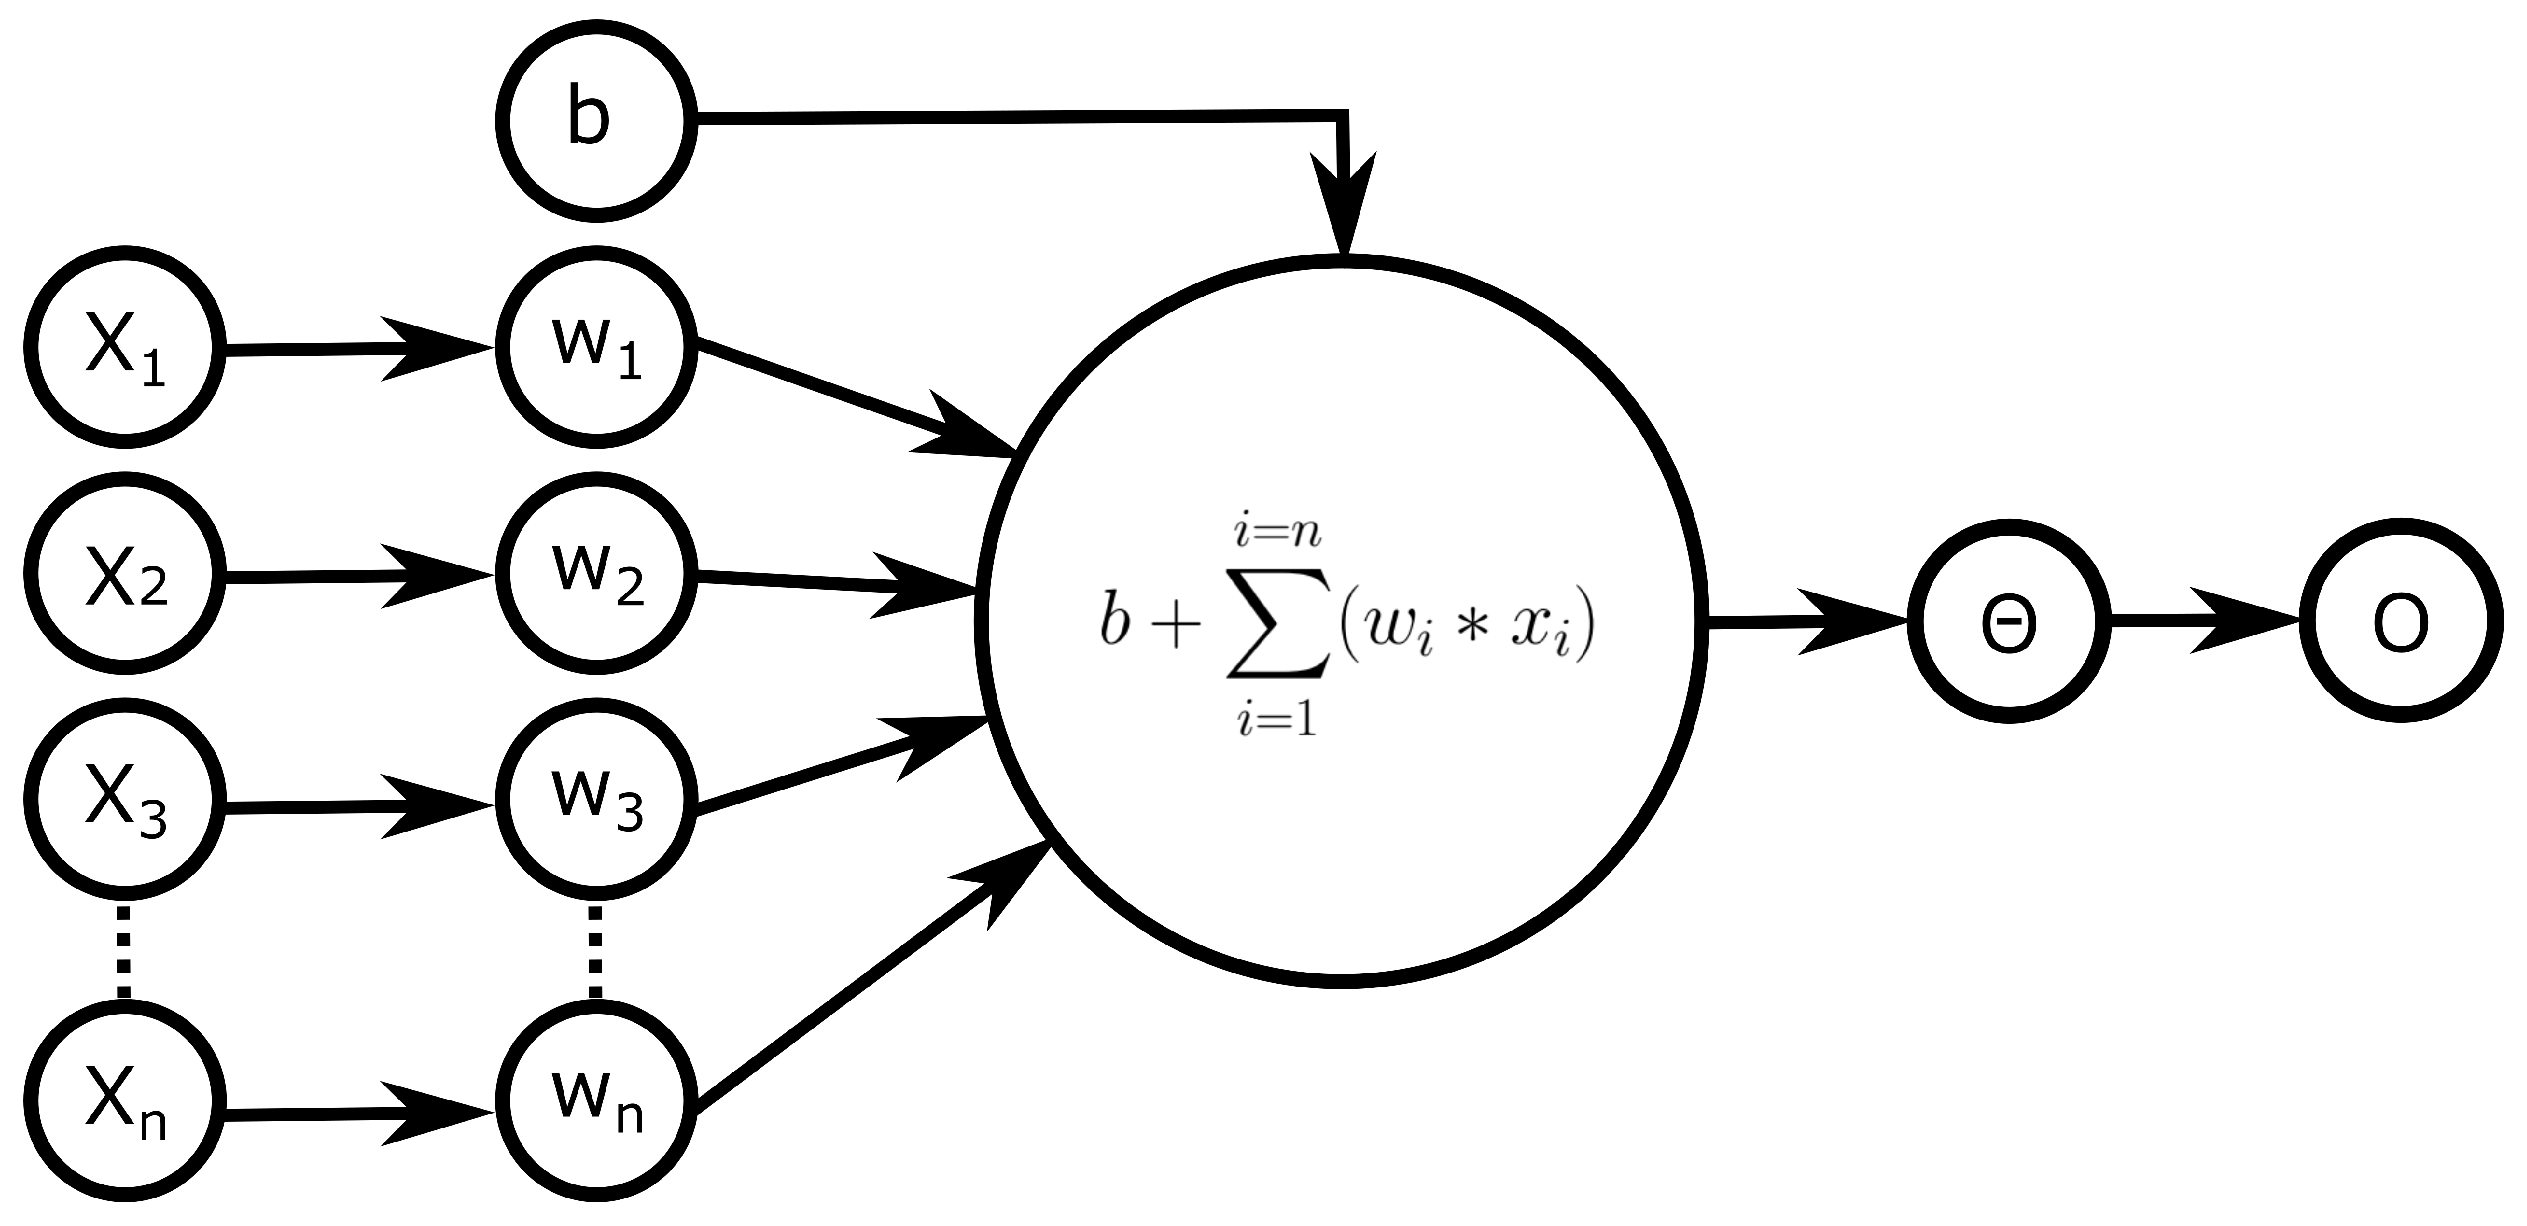

In [84]:
  DISPLAY(javax.imageio.ImageIO.read(java.io.File("neuron.png")))

Since a neuron typically has multiple inputs, many w times x products flow into it. Besides these weighted inputs, the neuron also has a bias. This bias can be thought of as the neuron's innate tendency to activate. It can either increase or decrease the neuron's activation regardless of the input values. The bias essentially adjusts the overall input to the neuron by either adding to or subtracting from the sum of the weighted inputs.

Once all the w times x products from the inputs are summed together with the bias, this total is then passed through an activation function. The activation function (denoted as $Θ$ in the image) is a mathematical operation that transforms the neuron's input into an output. Common activation functions include sigmoid and tanh, which are designed to squash the input into a certain range, introducing non-linearity into the model. For instance, in this example, we will use the tanh function as the activation function to demonstrate this process.

$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$


In [85]:
val xs = (-2000..2000).map { it / 500.0 }
val function = { x: Double -> Math.tanh(x) }
val ys = xs.map(function)

plot {
    line {
        x(xs)
        y(ys) {
            scale = continuous(-1.0..1.0)
        }
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.2.0/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="eM1YT5"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[-1.0,1.0]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y"
},
"stat":"identity",
"data":{
"x":[-4.0,-3.998,-3.996,-3.994,-3.992,-3.99,-3.988,-3.986,-3.984,-3.982,-3.98,-3.978,-3.976,-3.974,-3.972,-3.97,-3.968,-3.966,-3.964,-3.962,-3.96,-3.958,-3.956,-3.954,-3.952,-3.95,-3.948,-3.946,-3.944,-3.942,-3.94,-3.938,-3.936,-3.934,-3.932,-3.93,-3.928,-3.926,-3.924,-3.922,-3.92,-3.918,-3.916,-3.914,-3.912,-3.91,-3.908,-3.906,-3.904,-3.902,-3.9,-3.898,-3.896,-3.894,-3.892,-3.89,-3.888,-3.886,-3.884,-3.882,-3.88,-3.878,-3.876,-3.874,-3.872,-3.87,-3.868,-3.866,-3.864,-3.862,-3.86,-3.858,-3.856,-3.854,-3.852,-3.85,-3.848,-3.846,-3.844,-3.842,-3.84,-3.838,-3.836,-3.834,-3.832,-3.83,-3.828,-3.826,-3.824,-3.822,-3.82,-3.818,-3.816,-3.814,-3.812,-3.81,-3.808,-3.806,-3.804,-3.802,-3.8,-3.798,-3.796,-3.794,-3.792,-3.79,-3.788,-3.786,-3.784,-3.782,-3.78,-3.778,-3.776,-3.774,-3.772,-3.77,-3.768,-3.766,-3.764,-3.762,-3.76,-3.758,-3.756,-3.754,-3.752,-3.75,-3.748,-3.746,-3.744,-3.742,-3.74,-3.738,-3.736,-3.734,-3.732,-3.73,-3.728,-3.726,-3.724,-3.722,-3.72,-3.718,-3.716,-3.714,-3.712,-3.71,-3.708,-3.706,-3.704,-3.702,-3.7,-3.698,-3.696,-3.694,-3.692,-3.69,-3.688,-3.686,-3.684,-3.682,-3.68,-3.678,-3.676,-3.674,-3.672,-3.67,-3.668,-3.666,-3.664,-3.662,-3.66,-3.658,-3.656,-3.654,-3.652,-3.65,-3.648,-3.646,-3.644,-3.642,-3.64,-3.638,-3.636,-3.634,-3.632,-3.63,-3.628,-3.626,-3.624,-3.622,-3.62,-3.618,-3.616,-3.614,-3.612,-3.61,-3.608,-3.606,-3.604,-3.602,-3.6,-3.598,-3.596,-3.594,-3.592,-3.59,-3.588,-3.586,-3.584,-3.582,-3.58,-3.578,-3.576,-3.574,-3.572,-3.57,-3.568,-3.566,-3.564,-3.562,-3.56,-3.558,-3.556,-3.554,-3.552,-3.55,-3.548,-3.546,-3.544,-3.542,-3.54,-3.538,-3.536,-3.534,-3.532,-3.53,-3.528,-3.526,-3.524,-3.522,-3.52,-3.518,-3.516,-3.514,-3.512,-3.51,-3.508,-3.506,-3.504,-3.502,-3.5,-3.498,-3.496,-3.494,-3.492,-3.49,-3.488,-3.486,-3.484,-3.482,-3.48,-3.478,-3.476,-3.474,-3.472,-3.47,-3.468,-3.466,-3.464,-3.462,-3.46,-3.458,-3.456,-3.454,-3.452,-3.45,-3.448,-3.446,-3.444,-3.442,-3.44,-3.438,-3.436,-3.434,-3.432,-3.43,-3.428,-3.426,-3.424,-3.422,-3.42,-3.418,-3.416,-3.414,-3.412,-3.41,-3.408,-3.406,-3.404,-3.402,-3.4,-3.398,-3.396,-3.394,-3.392,-3.39,-3.388,-3.386,-3.384,-3.382,-3.38,-3.378,-3.376,-3.374,-3.372,-3.37,-3.368,-3.366,-3.364,-3.362,-3.36,-3.358,-3.356,-3.354,-3.352,-3.35,-3.348,-3.346,-3.344,-3.342,-3.34,-3.338,-3.336,-3.334,-3.332,-3.33,-3.328,-3.326,-3.324,-3.322,-3.32,-3.318,-3.316,-3.314,-3.312,-3.31,-3.308,-3.306,-3.304,-3.302,-3.3,-3.298,-3.296,-3.294,-3.292,-3.29,-3.288,-3.286,-3.284,-3.282,-3.28,-3.278,-3.276,-3.274,-3.272,-3.27,-3.268,-3.266,-3.264,-3.262,-3.26,-3.258,-3.256,-3.254,-3.252,-3.25,-3.248,-3.246,-3.244,-3.242,-3.24,-3.238,-3.236,-3.234,-3.232,-3.23,-3.228,-3.226,-3.224,-3.222,-3.22,-3.218,-3.216,-3.214,-3.212,-3.21,-3.208,-3.206,-3.204,-3.202,-3.2,-3.198,-3.196,-3.194,-3.192,-3.19,-3.188,-3.186,-3.184,-3.182,-3.18,-3.178,-3.176,-3.174,-3.172,-3.17,-3.168,-3.166,-3.164,-3.162,-3.16,-3.158,-3.156,-3.154,-3.152,-3.15,-3.148,-3.146,-3.144,-3.142,-3.14,-3.138,-3.136,-3.134,-3.132,-3.13,-3.128,-3.126,-3.124,-3.122,-3.12,-3.118,-3.116,-3.114,-3.112,-3.11,-3.108,-3.106,-3.104,-3.102,-3.1,-3.098,-3.096,-3.094,-3.092,-3.09,-3.088,-3.086,-3.084,-3.082,-3.08,-3.078,-3.076,-3.074,-3.072,-3.07,-3.068,-3.066,-3.064,-3.062,-3.06,-3.058,-3.056,-3.054,-3.052,-3.05,-3.048,-3.046,-3.044,-3.042,-3.04,-3.038,-3.036,-3.034,-3.032,-3.03,-3.028,-3.026,-3.024,-3.022,-3.02,-3.018,-3.016,-3.014,-3.012,-3.01,-3.008,-3.006,-3.004,-3.002,-3.0,-2.998,-2


The inputs to a neuron, after being processed by weights and bias, are then passed through an activation function like the tanh function. The tanh function squashes the input values into a range between -1 and 1.

When you input values close to zero into the tanh function, the output will also be close to zero. As the input values become more positive, the output approaches 1 but will never exceed this value, smoothly plateauing at 1. Conversely, as the input values become more negative, the output approaches -1, again plateauing smoothly at this value.

This squashing effect of the tanh function is crucial because it introduces non-linearity into the model, allowing the neural network to learn and model complex patterns. By limiting the output values to a specific range, the tanh function helps stabilize the output of neurons, making the learning process more effective.

Let's walk through the process of calculating the output of a neuron step-by-step.

In [86]:
//Inputs x1, x2
val x1 = Value(2.0, "x1")
val x2 = Value(0.0, "x2")

//Weights w1, w2
val w1 = Value(-3.0, "w1")
val w2 = Value(1.0, "w2")

//Bias of the neuron
val bias = Value(6.8813735870195428, "bias") // I selected that specific value for bias just to simplify the examples

// x1*w1 + x2*w2 + b
val x1w1 = x1*w1
x1w1.label = "x1w1"
val x2w2 = x2*w2
x2w2.label = "x2w2"

val x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

val n = x1w1x2w2 + bias
n.label = "n"

n.plot()

<!-- 1804870259 -->
 
 1804870259 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.0 
 
<!-- 1804870259+ -->
 
 1804870259+ 
 
 + 
 
<!-- 1804870259+->1804870259 -->
 
 1804870259+->1804870259 
 
 
 
<!-- 67174096 -->
 
 67174096 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 67174096->1804870259+ -->
 
 67174096->1804870259+ 
 
 
 
<!-- 67174096+ -->
 
 67174096+ 
 
 + 
 
<!-- 67174096+->67174096 -->
 
 67174096+->67174096 
 
 
 
<!-- 1211062422 -->
 
 1211062422 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1211062422->67174096+ -->
 
 1211062422->67174096+ 
 
 
 
<!-- 1211062422* -->
 
 1211062422* 
 
 * 
 
<!-- 1211062422*->1211062422 -->
 
 1211062422*->1211062422 
 
 
 
<!-- 2035165578 -->
 
 2035165578 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 2035165578->1211062422* -->
 
 2035165578->1211062422* 
 
 
 
<!-- 864230250 -->
 
 864230250 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 864230250->1211062422* -->
 
 864230250->1211062422* 
 
 
 
<!-- 813077940 -->
 
 813077940 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 813077940->67174096+ -->
 
 813077940->67174096+ 
 
 
 
<!-- 813077940* -->
 
 813077940* 
 
 * 
 
<!-- 813077940*->813077940 -->
 
 813077940*->813077940 
 
 
 
<!-- 45060292 -->
 
 45060292 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 45060292->813077940* -->
 
 45060292->813077940* 
 
 
 
<!-- 178645858 -->
 
 178645858 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 178645858->813077940* -->
 
 178645858->813077940* 
 
 
 
<!-- 567736599 -->
 
 567736599 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.0 
 
<!-- 567736599->1804870259+ -->
 
 567736599->1804870259+

Now, we need to pass our neuron’s output through an activation function, and for this example, we’ll use tanh. The output, which we'll call `o`, will be `n.tanh()`. However, we haven't implemented the `tanh` function yet in our `Value` class.



In [87]:
val o = n.tanh()

Line_99.jupyter.kts (1:11 - 15) Unresolved reference: tanh

The tanh function is a hyperbolic function that we can’t directly create using only the addition and multiplication operations we've implemented so far for the `Value` class. It requires exponentiation and division.

$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

One option would be to implement exponentiation directly, allowing us to calculate tanh using the above formula. However, for this example, we want to show that we don’t necessarily need to have the most atomic operations (like exponentiation) in our `Value` class. We can create functions at any level of abstraction whether very simple functions like addition or more complex ones like tanh.

The key is that we must know how to differentiate through any function we implement. As long as we can calculate the local derivative, which tells us how the function's input values impact its output, we can integrate that function into our computational graph.

So, instead of breaking down tanh into its atomic operations, we'll directly implement the tanh function within our `Value` class. This approach clusters the entire expression for tanh, allowing us to handle more complex operations without needing to decompose them into simpler ones. Let’s implement the tanh function directly.

In [88]:
class Value(var data: Double, var label: String? = null) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    var grad = 0.0
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
    }
    
    //We added the new tanh function
    fun tanh(): Value {
        val x = this.data
        val tanh = ((exp(2*x) - 1)) / ((exp(2*x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
        }
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
    
    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

Now computing the tanh for our output variable `o`:

In [89]:
//Inputs x1, x2
val x1 = Value(2.0, "x1")
val x2 = Value(0.0, "x2")

//Weights w1, w2
val w1 = Value(-3.0, "w1")
val w2 = Value(1.0, "w2")

//Bias of the neuron
val bias = Value(6.8813735870195428, "bias")

// x1*w1 + x2*w2 + b
val x1w1 = x1*w1
x1w1.label = "x1w1"
val x2w2 = x2*w2
x2w2.label = "x2w2"

val x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

val n = x1w1x2w2 + bias
n.label = "n"

val o = n.tanh()
o.label = "o"

In [90]:
o.plot()

<!-- 610489058 -->
 
 610489058 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  0.0 
 
<!-- 610489058tanh -->
 
 610489058tanh 
 
 tanh 
 
<!-- 610489058tanh->610489058 -->
 
 610489058tanh->610489058 
 
 
 
<!-- 1568982627 -->
 
 1568982627 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.0 
 
<!-- 1568982627->610489058tanh -->
 
 1568982627->610489058tanh 
 
 
 
<!-- 1568982627+ -->
 
 1568982627+ 
 
 + 
 
<!-- 1568982627+->1568982627 -->
 
 1568982627+->1568982627 
 
 
 
<!-- 1991863099 -->
 
 1991863099 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1991863099->1568982627+ -->
 
 1991863099->1568982627+ 
 
 
 
<!-- 1991863099+ -->
 
 1991863099+ 
 
 + 
 
<!-- 1991863099+->1991863099 -->
 
 1991863099+->1991863099 
 
 
 
<!-- 269604118 -->
 
 269604118 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 269604118->1991863099+ -->
 
 269604118->1991863099+ 
 
 
 
<!-- 269604118* -->
 
 269604118* 
 
 * 
 
<!-- 269604118*->269604118 -->
 
 269604118*->269604118 
 
 
 
<!-- 777740724 -->
 
 777740724 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 777740724->269604118* -->
 
 777740724->269604118* 
 
 
 
<!-- 1427578306 -->
 
 1427578306 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1427578306->269604118* -->
 
 1427578306->269604118* 
 
 
 
<!-- 1758086376 -->
 
 1758086376 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1758086376->1991863099+ -->
 
 1758086376->1991863099+ 
 
 
 
<!-- 1758086376* -->
 
 1758086376* 
 
 * 
 
<!-- 1758086376*->1758086376 -->
 
 1758086376*->1758086376 
 
 
 
<!-- 1995281794 -->
 
 1995281794 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1995281794->1758086376* -->
 
 1995281794->1758086376* 
 
 
 
<!-- 63839274 -->
 
 63839274 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 63839274->1758086376* -->
 
 63839274->1758086376* 
 
 
 
<!-- 1859844252 -->
 
 1859844252 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.0 
 
<!-- 1859844252->1568982627+ -->
 
 1859844252->1568982627+

### Detailed example illustrating manual backpropagation for a neuron.

Now, let's proceed with backpropagation and fill in all the gradients. We want to find the derivative of the output $𝑜$ with respect to all the inputs. In a typical neural network setting, we are particularly interested in the derivatives with respect to the weights of the neuron, such as $𝑤1$ and $𝑤2$, because these are the weights that we will adjust during the optimization process.

In a real neural network, there are usually many neurons connected together, and each one contributes to the overall network. Here, we're focusing on a single neuron as part of a larger network. Ultimately, there's a loss function that measures the accuracy of the neural network, and we backpropagate with respect to this loss function to improve the network's accuracy.

To start backpropagation, let's consider the derivative of $𝑜$ with respect to $𝑜$. This is our base case, and the gradient here is always 1.0 because changing $𝑜$ by a small amount directly changes $𝑜$ by the same amount. So, we initialize the gradient of $𝑜$ with respect to $𝑜$ as 1.0.

In [91]:
o.grad = 1.0

In [92]:
o.plot()

<!-- 610489058 -->
 
 610489058 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 610489058tanh -->
 
 610489058tanh 
 
 tanh 
 
<!-- 610489058tanh->610489058 -->
 
 610489058tanh->610489058 
 
 
 
<!-- 1568982627 -->
 
 1568982627 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.0 
 
<!-- 1568982627->610489058tanh -->
 
 1568982627->610489058tanh 
 
 
 
<!-- 1568982627+ -->
 
 1568982627+ 
 
 + 
 
<!-- 1568982627+->1568982627 -->
 
 1568982627+->1568982627 
 
 
 
<!-- 1991863099 -->
 
 1991863099 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1991863099->1568982627+ -->
 
 1991863099->1568982627+ 
 
 
 
<!-- 1991863099+ -->
 
 1991863099+ 
 
 + 
 
<!-- 1991863099+->1991863099 -->
 
 1991863099+->1991863099 
 
 
 
<!-- 269604118 -->
 
 269604118 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 269604118->1991863099+ -->
 
 269604118->1991863099+ 
 
 
 
<!-- 269604118* -->
 
 269604118* 
 
 * 
 
<!-- 269604118*->269604118 -->
 
 269604118*->269604118 
 
 
 
<!-- 777740724 -->
 
 777740724 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 777740724->269604118* -->
 
 777740724->269604118* 
 
 
 
<!-- 1427578306 -->
 
 1427578306 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1427578306->269604118* -->
 
 1427578306->269604118* 
 
 
 
<!-- 1758086376 -->
 
 1758086376 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1758086376->1991863099+ -->
 
 1758086376->1991863099+ 
 
 
 
<!-- 1758086376* -->
 
 1758086376* 
 
 * 
 
<!-- 1758086376*->1758086376 -->
 
 1758086376*->1758086376 
 
 
 
<!-- 1995281794 -->
 
 1995281794 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1995281794->1758086376* -->
 
 1995281794->1758086376* 
 
 
 
<!-- 63839274 -->
 
 63839274 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 63839274->1758086376* -->
 
 63839274->1758086376* 
 
 
 
<!-- 1859844252 -->
 
 1859844252 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.0 
 
<!-- 1859844252->1568982627+ -->
 
 1859844252->1568982627+

Now, we are going to backpropagate through the tanh function. To backpropagate through tanh, we need to know the local derivative of tanh. If we have that $ o = \tanh(n) $, then we need to find $ \frac{\partial o}{\partial n} $.

One way to find this derivative is by performing calculus on the expression, but an easier method is to use the known derivative of the tanh function (you can find it in [Wikipedia](https://en.wikipedia.org/wiki/Hyperbolic_functions#Derivatives)). According to the mathematical definition, the derivative of tanh with respect to its input $ x $ is:

$$ \frac{d}{dx} \tanh(x) = 1 - \tanh^2(x) $$

Applying this to our scenario, we have:

$$ \frac{\partial o}{\partial n} = 1 - \tanh^2(n) $$

Since $ o = \tanh(n) $, we can substitute $ o $ into the derivative formula:

$$ \frac{\partial o}{\partial n} = 1 - o^2 $$

Here, $ o $ is the output value we have already computed. To find the local derivative, we square the value of $ o $ and subtract it from 1.


In [93]:
n.grad = 1.0 - o.data.pow(2.0)

In [94]:
o.plot()

<!-- 610489058 -->
 
 610489058 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 610489058tanh -->
 
 610489058tanh 
 
 tanh 
 
<!-- 610489058tanh->610489058 -->
 
 610489058tanh->610489058 
 
 
 
<!-- 1568982627 -->
 
 1568982627 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 1568982627->610489058tanh -->
 
 1568982627->610489058tanh 
 
 
 
<!-- 1568982627+ -->
 
 1568982627+ 
 
 + 
 
<!-- 1568982627+->1568982627 -->
 
 1568982627+->1568982627 
 
 
 
<!-- 1991863099 -->
 
 1991863099 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1991863099->1568982627+ -->
 
 1991863099->1568982627+ 
 
 
 
<!-- 1991863099+ -->
 
 1991863099+ 
 
 + 
 
<!-- 1991863099+->1991863099 -->
 
 1991863099+->1991863099 
 
 
 
<!-- 269604118 -->
 
 269604118 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 269604118->1991863099+ -->
 
 269604118->1991863099+ 
 
 
 
<!-- 269604118* -->
 
 269604118* 
 
 * 
 
<!-- 269604118*->269604118 -->
 
 269604118*->269604118 
 
 
 
<!-- 777740724 -->
 
 777740724 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 777740724->269604118* -->
 
 777740724->269604118* 
 
 
 
<!-- 1427578306 -->
 
 1427578306 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1427578306->269604118* -->
 
 1427578306->269604118* 
 
 
 
<!-- 1758086376 -->
 
 1758086376 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1758086376->1991863099+ -->
 
 1758086376->1991863099+ 
 
 
 
<!-- 1758086376* -->
 
 1758086376* 
 
 * 
 
<!-- 1758086376*->1758086376 -->
 
 1758086376*->1758086376 
 
 
 
<!-- 1995281794 -->
 
 1995281794 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1995281794->1758086376* -->
 
 1995281794->1758086376* 
 
 
 
<!-- 63839274 -->
 
 63839274 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 63839274->1758086376* -->
 
 63839274->1758086376* 
 
 
 
<!-- 1859844252 -->
 
 1859844252 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.0 
 
<!-- 1859844252->1568982627+ -->
 
 1859844252->1568982627+

Continuing with backpropagation, we determined that the gradient through the tanh operation is approximately 0.5. Now, we encounter a plus node. To understand how backpropagation works through a plus node, we should recall that a plus operation simply distributes the gradient equally to its inputs.

The local derivative of a plus operation is 1 for each of its inputs. Therefore, the gradient through the plus node will be distributed equally to both of its input nodes. This means the gradient 0.5 from the tanh operation will flow to both inputs of the plus node. Let's set those and then plot again.

In [95]:
x1w1x2w2.grad = 0.5
bias.grad = 0.5
o.plot()

<!-- 610489058 -->
 
 610489058 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 610489058tanh -->
 
 610489058tanh 
 
 tanh 
 
<!-- 610489058tanh->610489058 -->
 
 610489058tanh->610489058 
 
 
 
<!-- 1568982627 -->
 
 1568982627 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 1568982627->610489058tanh -->
 
 1568982627->610489058tanh 
 
 
 
<!-- 1568982627+ -->
 
 1568982627+ 
 
 + 
 
<!-- 1568982627+->1568982627 -->
 
 1568982627+->1568982627 
 
 
 
<!-- 1991863099 -->
 
 1991863099 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.5 
 
<!-- 1991863099->1568982627+ -->
 
 1991863099->1568982627+ 
 
 
 
<!-- 1991863099+ -->
 
 1991863099+ 
 
 + 
 
<!-- 1991863099+->1991863099 -->
 
 1991863099+->1991863099 
 
 
 
<!-- 269604118 -->
 
 269604118 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 269604118->1991863099+ -->
 
 269604118->1991863099+ 
 
 
 
<!-- 269604118* -->
 
 269604118* 
 
 * 
 
<!-- 269604118*->269604118 -->
 
 269604118*->269604118 
 
 
 
<!-- 777740724 -->
 
 777740724 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 777740724->269604118* -->
 
 777740724->269604118* 
 
 
 
<!-- 1427578306 -->
 
 1427578306 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1427578306->269604118* -->
 
 1427578306->269604118* 
 
 
 
<!-- 1758086376 -->
 
 1758086376 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1758086376->1991863099+ -->
 
 1758086376->1991863099+ 
 
 
 
<!-- 1758086376* -->
 
 1758086376* 
 
 * 
 
<!-- 1758086376*->1758086376 -->
 
 1758086376*->1758086376 
 
 
 
<!-- 1995281794 -->
 
 1995281794 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1995281794->1758086376* -->
 
 1995281794->1758086376* 
 
 
 
<!-- 63839274 -->
 
 63839274 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 63839274->1758086376* -->
 
 63839274->1758086376* 
 
 
 
<!-- 1859844252 -->
 
 1859844252 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.5 
 
<!-- 1859844252->1568982627+ -->
 
 1859844252->1568982627+


Continuing with the backpropagation process, we next distribute the gradient through the preceding operations. In this case, we have another operation with a local derivative of 0.5. We need to distribute this 0.5 gradient to both of the inputs to the addition operation.

Since addition is straightforward to backpropagate through, we simply distribute the gradient to each operand equally, as we did before.

In [96]:
x1w1.grad = 0.5
x2w2.grad = 0.5
o.plot()

<!-- 610489058 -->
 
 610489058 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 610489058tanh -->
 
 610489058tanh 
 
 tanh 
 
<!-- 610489058tanh->610489058 -->
 
 610489058tanh->610489058 
 
 
 
<!-- 1568982627 -->
 
 1568982627 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 1568982627->610489058tanh -->
 
 1568982627->610489058tanh 
 
 
 
<!-- 1568982627+ -->
 
 1568982627+ 
 
 + 
 
<!-- 1568982627+->1568982627 -->
 
 1568982627+->1568982627 
 
 
 
<!-- 1991863099 -->
 
 1991863099 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.5 
 
<!-- 1991863099->1568982627+ -->
 
 1991863099->1568982627+ 
 
 
 
<!-- 1991863099+ -->
 
 1991863099+ 
 
 + 
 
<!-- 1991863099+->1991863099 -->
 
 1991863099+->1991863099 
 
 
 
<!-- 269604118 -->
 
 269604118 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.5 
 
<!-- 269604118->1991863099+ -->
 
 269604118->1991863099+ 
 
 
 
<!-- 269604118* -->
 
 269604118* 
 
 * 
 
<!-- 269604118*->269604118 -->
 
 269604118*->269604118 
 
 
 
<!-- 777740724 -->
 
 777740724 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 777740724->269604118* -->
 
 777740724->269604118* 
 
 
 
<!-- 1427578306 -->
 
 1427578306 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1427578306->269604118* -->
 
 1427578306->269604118* 
 
 
 
<!-- 1758086376 -->
 
 1758086376 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.5 
 
<!-- 1758086376->1991863099+ -->
 
 1758086376->1991863099+ 
 
 
 
<!-- 1758086376* -->
 
 1758086376* 
 
 * 
 
<!-- 1758086376*->1758086376 -->
 
 1758086376*->1758086376 
 
 
 
<!-- 1995281794 -->
 
 1995281794 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1995281794->1758086376* -->
 
 1995281794->1758086376* 
 
 
 
<!-- 63839274 -->
 
 63839274 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 63839274->1758086376* -->
 
 63839274->1758086376* 
 
 
 
<!-- 1859844252 -->
 
 1859844252 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.5 
 
<!-- 1859844252->1568982627+ -->
 
 1859844252->1568982627+

So, again, it's important to remember what the derivative signifies. Along this path, it indicates that if we want the neuron's output to increase, both of these expressions have a positive influence on the output. Now, let's backpropagate to 𝑥2 and 𝑤2.


Firstly, considering 𝑥2, which is a multiplication node, we know the local derivative involves the other term. Therefore, to calculate `𝑥2.grad`, it will be `𝑤2.𝑑𝑎𝑡𝑎` times `𝑥2𝑤2.𝑔𝑟𝑎𝑑`.

Next, for 𝑤2, its gradient `𝑤2.grad` will be `𝑥2.data` times `𝑥2𝑤2.grad`.


This local application of the chain rule sets these gradients accordingly. Now, let's update and visualize the computational graph.

In [97]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
o.plot()

<!-- 610489058 -->
 
 610489058 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 610489058tanh -->
 
 610489058tanh 
 
 tanh 
 
<!-- 610489058tanh->610489058 -->
 
 610489058tanh->610489058 
 
 
 
<!-- 1568982627 -->
 
 1568982627 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 1568982627->610489058tanh -->
 
 1568982627->610489058tanh 
 
 
 
<!-- 1568982627+ -->
 
 1568982627+ 
 
 + 
 
<!-- 1568982627+->1568982627 -->
 
 1568982627+->1568982627 
 
 
 
<!-- 1991863099 -->
 
 1991863099 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.5 
 
<!-- 1991863099->1568982627+ -->
 
 1991863099->1568982627+ 
 
 
 
<!-- 1991863099+ -->
 
 1991863099+ 
 
 + 
 
<!-- 1991863099+->1991863099 -->
 
 1991863099+->1991863099 
 
 
 
<!-- 269604118 -->
 
 269604118 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.5 
 
<!-- 269604118->1991863099+ -->
 
 269604118->1991863099+ 
 
 
 
<!-- 269604118* -->
 
 269604118* 
 
 * 
 
<!-- 269604118*->269604118 -->
 
 269604118*->269604118 
 
 
 
<!-- 777740724 -->
 
 777740724 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 777740724->269604118* -->
 
 777740724->269604118* 
 
 
 
<!-- 1427578306 -->
 
 1427578306 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1427578306->269604118* -->
 
 1427578306->269604118* 
 
 
 
<!-- 1758086376 -->
 
 1758086376 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.5 
 
<!-- 1758086376->1991863099+ -->
 
 1758086376->1991863099+ 
 
 
 
<!-- 1758086376* -->
 
 1758086376* 
 
 * 
 
<!-- 1758086376*->1758086376 -->
 
 1758086376*->1758086376 
 
 
 
<!-- 1995281794 -->
 
 1995281794 
 
 x2 
 
 data:  0.0 
 
 grad:  0.5 
 
<!-- 1995281794->1758086376* -->
 
 1995281794->1758086376* 
 
 
 
<!-- 63839274 -->
 
 63839274 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 63839274->1758086376* -->
 
 63839274->1758086376* 
 
 
 
<!-- 1859844252 -->
 
 1859844252 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.5 
 
<!-- 1859844252->1568982627+ -->
 
 1859844252->1568982627+

Here, we observe that the gradient for $𝑤2$ is 0 because `𝑥2.data` was 0. However, $𝑥2$ will have a gradient of 0.5 because `w2.data` was 1.0.

The interesting observation here is that 𝑤2 has a gradient of 0. This makes intuitive sense: in the context of derivatives, it indicates how much a change in 𝑤2 affects the final output. Since 𝑥2 is 0, any change in 𝑤2 did not affect the output because w2 is multiplied by 0. Therefore, the derivative is 0, accurately reflecting that 𝑤2 does not impact the output when 𝑥2 is 0.

In a similar way we compute the derivatives for $x1$ and $w1$:

In [98]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
o.plot()

<!-- 610489058 -->
 
 610489058 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 610489058tanh -->
 
 610489058tanh 
 
 tanh 
 
<!-- 610489058tanh->610489058 -->
 
 610489058tanh->610489058 
 
 
 
<!-- 1568982627 -->
 
 1568982627 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 1568982627->610489058tanh -->
 
 1568982627->610489058tanh 
 
 
 
<!-- 1568982627+ -->
 
 1568982627+ 
 
 + 
 
<!-- 1568982627+->1568982627 -->
 
 1568982627+->1568982627 
 
 
 
<!-- 1991863099 -->
 
 1991863099 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.5 
 
<!-- 1991863099->1568982627+ -->
 
 1991863099->1568982627+ 
 
 
 
<!-- 1991863099+ -->
 
 1991863099+ 
 
 + 
 
<!-- 1991863099+->1991863099 -->
 
 1991863099+->1991863099 
 
 
 
<!-- 269604118 -->
 
 269604118 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.5 
 
<!-- 269604118->1991863099+ -->
 
 269604118->1991863099+ 
 
 
 
<!-- 269604118* -->
 
 269604118* 
 
 * 
 
<!-- 269604118*->269604118 -->
 
 269604118*->269604118 
 
 
 
<!-- 777740724 -->
 
 777740724 
 
 x1 
 
 data:  2.0 
 
 grad:  -1.5 
 
<!-- 777740724->269604118* -->
 
 777740724->269604118* 
 
 
 
<!-- 1427578306 -->
 
 1427578306 
 
 w1 
 
 data:  -3.0 
 
 grad:  1.0 
 
<!-- 1427578306->269604118* -->
 
 1427578306->269604118* 
 
 
 
<!-- 1758086376 -->
 
 1758086376 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.5 
 
<!-- 1758086376->1991863099+ -->
 
 1758086376->1991863099+ 
 
 
 
<!-- 1758086376* -->
 
 1758086376* 
 
 * 
 
<!-- 1758086376*->1758086376 -->
 
 1758086376*->1758086376 
 
 
 
<!-- 1995281794 -->
 
 1995281794 
 
 x2 
 
 data:  0.0 
 
 grad:  0.5 
 
<!-- 1995281794->1758086376* -->
 
 1995281794->1758086376* 
 
 
 
<!-- 63839274 -->
 
 63839274 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 63839274->1758086376* -->
 
 63839274->1758086376* 
 
 
 
<!-- 1859844252 -->
 
 1859844252 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.5 
 
<!-- 1859844252->1568982627+ -->
 
 1859844252->1568982627+

After completing the backpropagation through this expression, these are the final derivatives.

So, if we want to increase the output of this neuron, we observe that the gradient indicates what's needed: $𝑤2$ doesn't influence the output right now, but $𝑤1$ does. Increasing $𝑤1$ will directly increase the neuron's output, proportionally, because its gradient is one.

Performing backpropagation manually is obviously impractical, so let's automate the backward pass. By now, it should be clear from our examples how plus and times operations affect gradient propagation. We'll now extend the `Value` class to automate this process, integrating the principles we've discussed into the class methods.

### Implementing the backward function

Let's codify the backpropagation logic within the `Value` class to handle the gradient updates automatically.

To automate the backward pass, we'll enhance the ```Value``` class by introducing a special attribute, ```backwardFunction```. This attribute will be a function responsible for applying the chain rule at each node, computing how the gradient of the output propagates to the gradients of the inputs. Initially, ```backwardFunction``` will be set to a function that does nothing, which is appropriate for leaf nodes that don't have any operations to backpropagate through.

We'll then extend this function to perform the necessary gradient calculations for non-leaf nodes, effectively automating the backward pass and eliminating manual gradient computation.

In [99]:
class Value(var data: Double, var label: String? = null) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    var grad = 0.0
    //We add this attribute to store the function used to backpropagate through this node.
    var backwardFunction: () -> Unit = {}
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
        //We define the new backwardFunction for the plus operation
        plusResult.backwardFunction = fun(): Unit {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((exp(2*x) - 1)) / ((exp(2*x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
        }
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
    
    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

In backpropagation, we accumulate gradients rather than set them directly to ensure that all contributions to the gradient are combined. When a variable is used multiple times in an expression, each instance contributes to the gradient, and simply overwriting the gradient would lose this information. By using `+=`, we add each contribution to the gradient, ensuring accurate backpropagation. This change is crucial for properly computing gradients when variables influence the loss function through multiple paths in the computational graph. For more information please check the chain rule multivariable case in [Wikipedia](https://en.wikipedia.org/wiki/Chain_rule#Multivariable_case).

For the plus operation, when we create the output values (i.e., the result of adding two Value objects), we need to ensure that the gradient is properly propagated through these values during backpropagation. To achieve this, we will set the backward function for the output value (we called it `plusResult`) to handle this propagation. Here's how we can implement this:

1. We define a backward function for `plusResult` that will handle the gradient propagation. This function will be stored in a closure and will specify how the gradient of `plusResult` should be distributed to `this` and `other`.
2. In the backward function, we will set `this.grad` and `other.grad` to the appropriate values based on the chain rule. For addition, the local derivative with respect to both `this` and `other` is 1.0. Thus, `this.grad` will be `1.0 * plusResult.grad` and `other.grad` will also be `1.0 * plusResult.grad`.
3. This setup ensures that the gradient of out is properly copied to `this` and `other`, as per the rules of addition.


 Now let's extend our implementation to handle the multiplication operation. 

In [100]:
class Value(var data: Double, var label: String? = null) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    var grad = 0.0
    var backwardFunction: () -> Unit = {}
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
        plusResult.backwardFunction = fun(): Unit {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
        //We define the new backwardFunction for the times operation
        timesResult.backwardFunction = fun(): Unit {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((exp(2*x) - 1)) / ((exp(2*x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
        }
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }

    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
    
}

In extending our `Value` class to handle multiplication, we are ensuring that the backward propagation correctly handles the gradient flow through this operation. When we multiply two `Value` objects (this and other), we define a new `Value` object out to store the result. The backward function for this operation is crucial for propagating gradients properly during backpropagation.

Here's a description on how we implemented this:

We define the multiplication operation for `Value` objects by overloading the times operator. When `this` is multiplied by `other`, we create an output `Value` object out, as we disscused before. The backward function for `timesResult` is set to handle gradient propagation:

`this.grad` is updated by adding `other.data * timesResult.grad`, applying the chain rule where `other.data` represents the local derivative of this * other.

`other.grad` is updated by adding `this.data * timesResult.grad`, reflecting the chain rule where `this.data` represents the local derivative of this * other.

This ensures that the gradients flow correctly through the multiplication operation, allowing backpropagation in neural networks.

In extending our Value class to support the tanh function and its backward propagation, we ensure that gradients flow correctly through this activation function during backpropagation. Let's continue enhancing our Value class.

In [101]:
class Value(var data: Double, var label: String? = null) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    var grad = 0.0
    var backwardFunction: () -> Unit = {}
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
        plusResult.backwardFunction = fun(): Unit {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
        timesResult.backwardFunction = fun(): Unit {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((exp(2*x) - 1)) / ((exp(2*x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
            //We define the new backwardFunction for the tanh operation
            tanhResult.backwardFunction = fun(): Unit {
                this.grad += (1 - tanh.pow(2)) * tanhResult.grad
            }
        }
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
    
    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }    
}

When applying tanh to a `Value` object (this), we define a new `Value` object `tanhResult` to store the result of tanh(this.data). The backward function for `tanhResult` is crucial for propagating gradients properly:

- `this.grad` is updated by adding `(1 - tanh^2) * tanhResult.grad`, where tanhResult.data is the output of tanh(this.data).

- This reflects the chain rule application where `(1 - tanh^2)` is the local derivative of tanh with respect to its input.

In [102]:
//Inputs x1, x2
val x1 = Value(2.0, "x1")
val x2 = Value(0.0, "x2")

//Weights w1, w2
val w1 = Value(-3.0, "w1")
val w2 = Value(1.0, "w2")

//Bias of the neuron
val bias = Value(6.8813735870195428, "bias")

// x1*w1 + x2*w2 + b
val x1w1 = x1*w1
x1w1.label = "x1w1"
val x2w2 = x2*w2
x2w2.label = "x2w2"

val x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

val n = x1w1x2w2 + bias
n.label = "n"

val o = n.tanh()
o.label = "o"

Instead of manually computing gradients, we'll use the backward function that automates this process. Starting with the output $o$ which results from a tanh function, we'll initialize `o.grad` to 1.0 because it represents the derivative of the loss with respect to `o`, our base case as we discussed before. This sets the initial gradient propagation. Then, calling `o.backwardFunction()` triggers the function associated with $o$ to compute its gradient with respect to its inputs.

In [103]:
o.grad = 1.0
o.backwardFunction()
o.plot()

<!-- 1613095599 -->
 
 1613095599 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 1613095599tanh -->
 
 1613095599tanh 
 
 tanh 
 
<!-- 1613095599tanh->1613095599 -->
 
 1613095599tanh->1613095599 
 
 
 
<!-- 290540392 -->
 
 290540392 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 290540392->1613095599tanh -->
 
 290540392->1613095599tanh 
 
 
 
<!-- 290540392+ -->
 
 290540392+ 
 
 + 
 
<!-- 290540392+->290540392 -->
 
 290540392+->290540392 
 
 
 
<!-- 495713722 -->
 
 495713722 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 495713722->290540392+ -->
 
 495713722->290540392+ 
 
 
 
<!-- 495713722+ -->
 
 495713722+ 
 
 + 
 
<!-- 495713722+->495713722 -->
 
 495713722+->495713722 
 
 
 
<!-- 542640965 -->
 
 542640965 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 542640965->495713722+ -->
 
 542640965->495713722+ 
 
 
 
<!-- 542640965* -->
 
 542640965* 
 
 * 
 
<!-- 542640965*->542640965 -->
 
 542640965*->542640965 
 
 
 
<!-- 1864869243 -->
 
 1864869243 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 1864869243->542640965* -->
 
 1864869243->542640965* 
 
 
 
<!-- 1949739516 -->
 
 1949739516 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1949739516->542640965* -->
 
 1949739516->542640965* 
 
 
 
<!-- 915598573 -->
 
 915598573 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 915598573->495713722+ -->
 
 915598573->495713722+ 
 
 
 
<!-- 915598573* -->
 
 915598573* 
 
 * 
 
<!-- 915598573*->915598573 -->
 
 915598573*->915598573 
 
 
 
<!-- 1450236761 -->
 
 1450236761 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1450236761->915598573* -->
 
 1450236761->915598573* 
 
 
 
<!-- 70164625 -->
 
 70164625 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 70164625->915598573* -->
 
 70164625->915598573* 
 
 
 
<!-- 1167495329 -->
 
 1167495329 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.0 
 
<!-- 1167495329->290540392+ -->
 
 1167495329->290540392+

Now we need to call `n.backwardFunction()`

In [104]:
n.backwardFunction()
o.plot()

<!-- 1613095599 -->
 
 1613095599 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 1613095599tanh -->
 
 1613095599tanh 
 
 tanh 
 
<!-- 1613095599tanh->1613095599 -->
 
 1613095599tanh->1613095599 
 
 
 
<!-- 290540392 -->
 
 290540392 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 290540392->1613095599tanh -->
 
 290540392->1613095599tanh 
 
 
 
<!-- 290540392+ -->
 
 290540392+ 
 
 + 
 
<!-- 290540392+->290540392 -->
 
 290540392+->290540392 
 
 
 
<!-- 495713722 -->
 
 495713722 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 495713722->290540392+ -->
 
 495713722->290540392+ 
 
 
 
<!-- 495713722+ -->
 
 495713722+ 
 
 + 
 
<!-- 495713722+->495713722 -->
 
 495713722+->495713722 
 
 
 
<!-- 542640965 -->
 
 542640965 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 542640965->495713722+ -->
 
 542640965->495713722+ 
 
 
 
<!-- 542640965* -->
 
 542640965* 
 
 * 
 
<!-- 542640965*->542640965 -->
 
 542640965*->542640965 
 
 
 
<!-- 1864869243 -->
 
 1864869243 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 1864869243->542640965* -->
 
 1864869243->542640965* 
 
 
 
<!-- 1949739516 -->
 
 1949739516 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1949739516->542640965* -->
 
 1949739516->542640965* 
 
 
 
<!-- 915598573 -->
 
 915598573 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 915598573->495713722+ -->
 
 915598573->495713722+ 
 
 
 
<!-- 915598573* -->
 
 915598573* 
 
 * 
 
<!-- 915598573*->915598573 -->
 
 915598573*->915598573 
 
 
 
<!-- 1450236761 -->
 
 1450236761 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1450236761->915598573* -->
 
 1450236761->915598573* 
 
 
 
<!-- 70164625 -->
 
 70164625 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 70164625->915598573* -->
 
 70164625->915598573* 
 
 
 
<!-- 1167495329 -->
 
 1167495329 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.4999999999999999 
 
<!-- 1167495329->290540392+ -->
 
 1167495329->290540392+

The implementation of backward function successfully routed gradients to both variables.

Now, we could invoke `bias.backwardFunction()`. Since `bias` is a leaf node, its backward function is initially empty, so calling it won't trigger any operations.

In [105]:
bias.backwardFunction()
o.plot()

<!-- 1613095599 -->
 
 1613095599 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 1613095599tanh -->
 
 1613095599tanh 
 
 tanh 
 
<!-- 1613095599tanh->1613095599 -->
 
 1613095599tanh->1613095599 
 
 
 
<!-- 290540392 -->
 
 290540392 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 290540392->1613095599tanh -->
 
 290540392->1613095599tanh 
 
 
 
<!-- 290540392+ -->
 
 290540392+ 
 
 + 
 
<!-- 290540392+->290540392 -->
 
 290540392+->290540392 
 
 
 
<!-- 495713722 -->
 
 495713722 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 495713722->290540392+ -->
 
 495713722->290540392+ 
 
 
 
<!-- 495713722+ -->
 
 495713722+ 
 
 + 
 
<!-- 495713722+->495713722 -->
 
 495713722+->495713722 
 
 
 
<!-- 542640965 -->
 
 542640965 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 542640965->495713722+ -->
 
 542640965->495713722+ 
 
 
 
<!-- 542640965* -->
 
 542640965* 
 
 * 
 
<!-- 542640965*->542640965 -->
 
 542640965*->542640965 
 
 
 
<!-- 1864869243 -->
 
 1864869243 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 1864869243->542640965* -->
 
 1864869243->542640965* 
 
 
 
<!-- 1949739516 -->
 
 1949739516 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1949739516->542640965* -->
 
 1949739516->542640965* 
 
 
 
<!-- 915598573 -->
 
 915598573 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 915598573->495713722+ -->
 
 915598573->495713722+ 
 
 
 
<!-- 915598573* -->
 
 915598573* 
 
 * 
 
<!-- 915598573*->915598573 -->
 
 915598573*->915598573 
 
 
 
<!-- 1450236761 -->
 
 1450236761 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1450236761->915598573* -->
 
 1450236761->915598573* 
 
 
 
<!-- 70164625 -->
 
 70164625 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 70164625->915598573* -->
 
 70164625->915598573* 
 
 
 
<!-- 1167495329 -->
 
 1167495329 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.4999999999999999 
 
<!-- 1167495329->290540392+ -->
 
 1167495329->290540392+

When we call `x1w1x2w2.backwardFunction()` then we expect that 0.5 to get further routed

In [106]:
x1w1x2w2.backwardFunction()
o.plot()

<!-- 1613095599 -->
 
 1613095599 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 1613095599tanh -->
 
 1613095599tanh 
 
 tanh 
 
<!-- 1613095599tanh->1613095599 -->
 
 1613095599tanh->1613095599 
 
 
 
<!-- 290540392 -->
 
 290540392 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 290540392->1613095599tanh -->
 
 290540392->1613095599tanh 
 
 
 
<!-- 290540392+ -->
 
 290540392+ 
 
 + 
 
<!-- 290540392+->290540392 -->
 
 290540392+->290540392 
 
 
 
<!-- 495713722 -->
 
 495713722 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 495713722->290540392+ -->
 
 495713722->290540392+ 
 
 
 
<!-- 495713722+ -->
 
 495713722+ 
 
 + 
 
<!-- 495713722+->495713722 -->
 
 495713722+->495713722 
 
 
 
<!-- 542640965 -->
 
 542640965 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 542640965->495713722+ -->
 
 542640965->495713722+ 
 
 
 
<!-- 542640965* -->
 
 542640965* 
 
 * 
 
<!-- 542640965*->542640965 -->
 
 542640965*->542640965 
 
 
 
<!-- 1864869243 -->
 
 1864869243 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 1864869243->542640965* -->
 
 1864869243->542640965* 
 
 
 
<!-- 1949739516 -->
 
 1949739516 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1949739516->542640965* -->
 
 1949739516->542640965* 
 
 
 
<!-- 915598573 -->
 
 915598573 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.4999999999999999 
 
<!-- 915598573->495713722+ -->
 
 915598573->495713722+ 
 
 
 
<!-- 915598573* -->
 
 915598573* 
 
 * 
 
<!-- 915598573*->915598573 -->
 
 915598573*->915598573 
 
 
 
<!-- 1450236761 -->
 
 1450236761 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1450236761->915598573* -->
 
 1450236761->915598573* 
 
 
 
<!-- 70164625 -->
 
 70164625 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 70164625->915598573* -->
 
 70164625->915598573* 
 
 
 
<!-- 1167495329 -->
 
 1167495329 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.4999999999999999 
 
<!-- 1167495329->290540392+ -->
 
 1167495329->290540392+

Next we need to call the backward function for x1w1 and x2w2.

In [107]:
x1w1.backwardFunction()
x2w2.backwardFunction()
o.plot()

<!-- 1613095599 -->
 
 1613095599 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 1613095599tanh -->
 
 1613095599tanh 
 
 tanh 
 
<!-- 1613095599tanh->1613095599 -->
 
 1613095599tanh->1613095599 
 
 
 
<!-- 290540392 -->
 
 290540392 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 290540392->1613095599tanh -->
 
 290540392->1613095599tanh 
 
 
 
<!-- 290540392+ -->
 
 290540392+ 
 
 + 
 
<!-- 290540392+->290540392 -->
 
 290540392+->290540392 
 
 
 
<!-- 495713722 -->
 
 495713722 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 495713722->290540392+ -->
 
 495713722->290540392+ 
 
 
 
<!-- 495713722+ -->
 
 495713722+ 
 
 + 
 
<!-- 495713722+->495713722 -->
 
 495713722+->495713722 
 
 
 
<!-- 542640965 -->
 
 542640965 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 542640965->495713722+ -->
 
 542640965->495713722+ 
 
 
 
<!-- 542640965* -->
 
 542640965* 
 
 * 
 
<!-- 542640965*->542640965 -->
 
 542640965*->542640965 
 
 
 
<!-- 1864869243 -->
 
 1864869243 
 
 x1 
 
 data:  2.0 
 
 grad:  -1.4999999999999996 
 
<!-- 1864869243->542640965* -->
 
 1864869243->542640965* 
 
 
 
<!-- 1949739516 -->
 
 1949739516 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.9999999999999998 
 
<!-- 1949739516->542640965* -->
 
 1949739516->542640965* 
 
 
 
<!-- 915598573 -->
 
 915598573 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.4999999999999999 
 
<!-- 915598573->495713722+ -->
 
 915598573->495713722+ 
 
 
 
<!-- 915598573* -->
 
 915598573* 
 
 * 
 
<!-- 915598573*->915598573 -->
 
 915598573*->915598573 
 
 
 
<!-- 1450236761 -->
 
 1450236761 
 
 x2 
 
 data:  0.0 
 
 grad:  0.4999999999999999 
 
<!-- 1450236761->915598573* -->
 
 1450236761->915598573* 
 
 
 
<!-- 70164625 -->
 
 70164625 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 70164625->915598573* -->
 
 70164625->915598573* 
 
 
 
<!-- 1167495329 -->
 
 1167495329 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.4999999999999999 
 
<!-- 1167495329->290540392+ -->
 
 1167495329->290540392+

We obtained the same results (-1.5, 1, 0.5, 0) as before, but this time we computed them using the backward function, which automates the gradient computation through each node.

### Implementing the backward function for an entire expression graph.

To fully automate the backpropagation process, we need to avoid manually calling the `backwardFunction` function. Instead, we should ensure that we process each node only after all its dependencies have been addressed. This can be achieved using topological sorting, which orders the nodes of our graph such that all edges go from left to right, in simple terms topological ordering is any ordering where parents come before children.

For our purposes, we start with the output node o and ensure that all dependencies of a node are processed before the node itself. The algorithm proceeds as follows: maintain a set of visited nodes and a list for the topological order. Starting from $o$, the algorithm visits all its children, recursively calling the topological sort function on each child. Only after all children of a node are processed is the node itself added to the topological list. This ensures that nodes are added to the list in an order where all dependencies of a node are processed before the node itself.

We will implement the topological ordering in the `buildTopo` method:

In [108]:
var topo = mutableListOf<Value>()
var visited = mutableSetOf<Value>()
fun buildTopo(v: Value) {
    if (!visited.contains(v)) {
        visited.add(v)
        for (child in v.children) {
            buildTopo(child)
        }
        topo.add(v)
    }
}

In [109]:
buildTopo(o)
topo

[Value(data=2.0), Value(data=-3.0), Value(data=-6.0), Value(data=0.0), Value(data=1.0), Value(data=0.0), Value(data=-6.0), Value(data=6.881373587019543), Value(data=0.8813735870195432), Value(data=0.7071067811865476)]

When we inspect the resulting list after applying this sort starting from `o`, we should see that the nodes are ordered correctly for backpropagation, with the output node being the last in the list. This topological order guarantees the correct sequence for propagating gradients backward through the computational graph. 


To correctly propagate gradients, we need to call the `backwardFunction` from the end of the list to the beginning, ensuring the correct order of operations.

Before we automatically call `backwardFunction` for each node we need to zero all gradients of the graph, and set `o.grad = 1.0`.

In [110]:
for (v in topo) {
    v.grad = 0.0
}
o.grad = 1.0

Now we compute the gradient for the neuron:

In [111]:
for (v in topo.reversed()) {
    v.backwardFunction()
}

In [112]:
o.plot()

<!-- 1613095599 -->
 
 1613095599 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 1613095599tanh -->
 
 1613095599tanh 
 
 tanh 
 
<!-- 1613095599tanh->1613095599 -->
 
 1613095599tanh->1613095599 
 
 
 
<!-- 290540392 -->
 
 290540392 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 290540392->1613095599tanh -->
 
 290540392->1613095599tanh 
 
 
 
<!-- 290540392+ -->
 
 290540392+ 
 
 + 
 
<!-- 290540392+->290540392 -->
 
 290540392+->290540392 
 
 
 
<!-- 495713722 -->
 
 495713722 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 495713722->290540392+ -->
 
 495713722->290540392+ 
 
 
 
<!-- 495713722+ -->
 
 495713722+ 
 
 + 
 
<!-- 495713722+->495713722 -->
 
 495713722+->495713722 
 
 
 
<!-- 542640965 -->
 
 542640965 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 542640965->495713722+ -->
 
 542640965->495713722+ 
 
 
 
<!-- 542640965* -->
 
 542640965* 
 
 * 
 
<!-- 542640965*->542640965 -->
 
 542640965*->542640965 
 
 
 
<!-- 1864869243 -->
 
 1864869243 
 
 x1 
 
 data:  2.0 
 
 grad:  -1.4999999999999996 
 
<!-- 1864869243->542640965* -->
 
 1864869243->542640965* 
 
 
 
<!-- 1949739516 -->
 
 1949739516 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.9999999999999998 
 
<!-- 1949739516->542640965* -->
 
 1949739516->542640965* 
 
 
 
<!-- 915598573 -->
 
 915598573 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.4999999999999999 
 
<!-- 915598573->495713722+ -->
 
 915598573->495713722+ 
 
 
 
<!-- 915598573* -->
 
 915598573* 
 
 * 
 
<!-- 915598573*->915598573 -->
 
 915598573*->915598573 
 
 
 
<!-- 1450236761 -->
 
 1450236761 
 
 x2 
 
 data:  0.0 
 
 grad:  0.4999999999999999 
 
<!-- 1450236761->915598573* -->
 
 1450236761->915598573* 
 
 
 
<!-- 70164625 -->
 
 70164625 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 70164625->915598573* -->
 
 70164625->915598573* 
 
 
 
<!-- 1167495329 -->
 
 1167495329 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.4999999999999999 
 
<!-- 1167495329->290540392+ -->
 
 1167495329->290540392+

To streamline this process, we encapsulate the above logic within the `Value` class. We define a `backward` method, which builds the topological graph starting from the current node, sets the gradient of the node to 1, and then iterates over the nodes in reverse topological order, calling their `backwardFunction` methods. This simplifies backpropagation into a single method call, `o.backward()`, which correctly computes the gradients throughout the graph.

In [113]:
class Value(var data: Double, var label: String? = null) {

    var children: List<Value> = listOf() 
    var usedOperator: String? = null
    var grad = 0.0
    var backwardFunction: () -> Unit = {}
    
    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)
        plusResult.backwardFunction = fun(): Unit {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }
    
    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)
        timesResult.backwardFunction = fun(): Unit {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((exp(2*x) - 1)) / ((exp(2*x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
            tanhResult.backwardFunction = fun(): Unit {
                this.grad += (1 - tanh.pow(2)) * tanhResult.grad
            }
        }
    }
    
    fun backward() {
        var topo = mutableListOf<Value>()
        var visited = mutableSetOf<Value>()
        fun buildTopo(v: Value) {
            if (!visited.contains(v)) {
                visited.add(v)
                for (child in v.children) {
                    buildTopo(child)
                }
                topo.add(v)
            }
        }

        buildTopo(this)

        this.grad = 1.0
        for (v in topo.reversed()) {
            v.backwardFunction()
        }
    }
    
    override fun toString(): String {
        return "Value(data=$data)"
    }
    
    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }  
}

In [114]:
//Inputs x1, x2
val x1 = Value(2.0, "x1")
val x2 = Value(0.0, "x2")

//Weights w1, w2
val w1 = Value(-3.0, "w1")
val w2 = Value(1.0, "w2")

//Bias of the neuron
val bias = Value(6.8813735870195428, "bias")

// x1*w1 + x2*w2 + b
val x1w1 = x1*w1
x1w1.label = "x1w1"
val x2w2 = x2*w2
x2w2.label = "x2w2"

val x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

val n = x1w1x2w2 + bias
n.label = "n"

val o = n.tanh()
o.label = "o"

In [115]:
o.backward()
o.plot()

<!-- 464479640 -->
 
 464479640 
 
 o 
 
 data:  0.7071067811865476 
 
 grad:  1.0 
 
<!-- 464479640tanh -->
 
 464479640tanh 
 
 tanh 
 
<!-- 464479640tanh->464479640 -->
 
 464479640tanh->464479640 
 
 
 
<!-- 1903539444 -->
 
 1903539444 
 
 n 
 
 data:  0.8813735870195432 
 
 grad:  0.4999999999999999 
 
<!-- 1903539444->464479640tanh -->
 
 1903539444->464479640tanh 
 
 
 
<!-- 1903539444+ -->
 
 1903539444+ 
 
 + 
 
<!-- 1903539444+->1903539444 -->
 
 1903539444+->1903539444 
 
 
 
<!-- 631137789 -->
 
 631137789 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 631137789->1903539444+ -->
 
 631137789->1903539444+ 
 
 
 
<!-- 631137789+ -->
 
 631137789+ 
 
 + 
 
<!-- 631137789+->631137789 -->
 
 631137789+->631137789 
 
 
 
<!-- 505240498 -->
 
 505240498 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.4999999999999999 
 
<!-- 505240498->631137789+ -->
 
 505240498->631137789+ 
 
 
 
<!-- 505240498* -->
 
 505240498* 
 
 * 
 
<!-- 505240498*->505240498 -->
 
 505240498*->505240498 
 
 
 
<!-- 2130607692 -->
 
 2130607692 
 
 x1 
 
 data:  2.0 
 
 grad:  -1.4999999999999996 
 
<!-- 2130607692->505240498* -->
 
 2130607692->505240498* 
 
 
 
<!-- 586200947 -->
 
 586200947 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.9999999999999998 
 
<!-- 586200947->505240498* -->
 
 586200947->505240498* 
 
 
 
<!-- 1956093789 -->
 
 1956093789 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.4999999999999999 
 
<!-- 1956093789->631137789+ -->
 
 1956093789->631137789+ 
 
 
 
<!-- 1956093789* -->
 
 1956093789* 
 
 * 
 
<!-- 1956093789*->1956093789 -->
 
 1956093789*->1956093789 
 
 
 
<!-- 10721974 -->
 
 10721974 
 
 x2 
 
 data:  0.0 
 
 grad:  0.4999999999999999 
 
<!-- 10721974->1956093789* -->
 
 10721974->1956093789* 
 
 
 
<!-- 220371184 -->
 
 220371184 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 220371184->1956093789* -->
 
 220371184->1956093789* 
 
 
 
<!-- 709819656 -->
 
 709819656 
 
 bias 
 
 data:  6.881373587019543 
 
 grad:  0.4999999999999999 
 
<!-- 709819656->1903539444+ -->
 
 709819656->1903539444+

Ok, finally that is backpropagation for one neuron!

### Breaking Down Tanh: Using More Operations for Better Understanding

Let's revisit the non-linearity, specifically the tanh function we implemented. Previously, we chose to implement tanh as a single function because we know its derivative and can backpropagate through it. However, tanh can also be broken down into its explicit components using the exponential function.

We initially developed tanh as a single function, leveraging our knowledge of its derivative for backpropagation. Now, I want to demonstrate that we can achieve the same results by breaking down tanh into its constituent operations. This process will not only prove that the results are equivalent but also force us to implement additional expressions like exponentiation, subtraction, and division. This exercise is valuable as it will enhance our understanding and implementation of more complex operations within our computational graph.

By breaking down tanh into these basic operations, we will:

- Implement exponentiation ($ x^n $).
- Implement \$ e^x \$.
- Implement subtraction.
- Use addition.
- Implement division.


First, let's modify our `Value` class to handle operations with both `Value` objects and regular numbers. Currently, we can create a `Value` object with a numerical value, but when we try to add or multiply a Value object with a number directly, it raises an error. 

In [116]:
val x = Value(2.0)
x + 1

Line_142.jupyter.kts (2:5 - 6) The integer literal does not conform to the expected type Line_138_jupyter.Value

We need to make sure our operations can handle both Value objects and numbers by wrapping numbers into Value objects when necessary. This allows us to write expressions like `x + 1` and have them make sense.

In [117]:
class Value(var data: Double, var label: String? = null) {

    private var children: List<Value> = listOf()
    private var usedOperator: String? = null
    internal var grad = 0.0
    private var backwardFunction: () -> Unit = {}

    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)

        plusResult.backwardFunction = fun() {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }

    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)

        timesResult.backwardFunction = fun() {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }

    operator fun plus(other: Double): Value = plus(Value(other))

    operator fun times(other: Double): Value = times(Value(other))

    operator fun unaryMinus(): Value = this * -1.0

    fun tanh(): Value {
        val x = this.data
        val tanh = ((kotlin.math.exp(2 * x) - 1)) / ((kotlin.math.exp(2 * x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
            tanhResult.backwardFunction = fun() {
                this.grad += (1 - tanh.pow(2)) * tanhResult.grad
            }
        }
    }

    fun backward() {
        val topo = mutableListOf<Value>()
        val visited = mutableSetOf<Value>()
        fun buildTopo(v: Value) {
            if (!visited.contains(v)) {
                visited.add(v)
                for (child in v.children) {
                    buildTopo(child)
                }
                topo.add(v)
            }
        }

        buildTopo(this)

        this.grad = 1.0
        for (v in topo.reversed()) {
            v.backwardFunction()
        }
    }

    override fun toString(): String {
        return "Value(data=$data)"
    }

    fun plot(): Graphviz {

        Graphviz.useEngine(GraphvizJdkEngine())

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach { node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let { so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

Now let's test our changes:

In [118]:
val x = Value(2.0)
x + 1.0

Value(data=3.0)

In [119]:
x * 2.0

Value(data=4.0)

In [120]:
-x

Value(data=-2.0)

To implement the `pow` function within the `Value` class for exponentiation, we define how our computational graph handles raising a value to a power. We restrict exponentiation to double values only, not allowing exponentiation with another `Value` object.

During the forward pass, `self.data` is raised to the power of `other`, using Kotlin's `Math.pow`.

For the backward function, we propagate gradients through the `pow` operation. When we have an equation $c = a^b$ where $b$ is a constant, and we want to compute gradients (backpropagation) through this operation in a computational graph, here’s how it works:

Compute the gradient of some loss $ L $ with respect to $ c $, denoted as $ \frac{\partial L}{\partial c} $.

For the gradient with respect to $ a $, where $ b $ is constant, applying the chain rule gives us:

$$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial c} \cdot \frac{\partial c}{\partial a} = \frac{\partial L}{\partial c} \cdot b \cdot a^{b-1} $$


Therefore, we compute the local derivative as `other * this.data.pow(other - 1)`. This local derivative is then chained with `powResult.grad`, where `powResult` is the subsequent node in the graph dependent on this `Value` object.



In [121]:
class Value(var data: Double, var label: String? = null) {

    private var children: List<Value> = listOf()
    private var usedOperator: String? = null
    internal var grad = 0.0
    private var backwardFunction: () -> Unit = {}

    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)

        plusResult.backwardFunction = fun() {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }

    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)

        timesResult.backwardFunction = fun() {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }

    operator fun plus(other: Double): Value = plus(Value(other))

    operator fun times(other: Double): Value = times(Value(other))

    operator fun unaryMinus(): Value = this * -1.0

    fun pow(other: Double): Value = Value(this.data.pow(other)).also { powResult ->
        powResult.usedOperator = "^"
        powResult.children = listOf(this)

        powResult.backwardFunction = fun() {
            this.grad += other * this.data.pow(other - 1) * powResult.grad
        }
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((kotlin.math.exp(2 * x) - 1)) / ((kotlin.math.exp(2 * x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
            tanhResult.backwardFunction = fun() {
                this.grad += (1 - tanh.pow(2)) * tanhResult.grad
            }
        }
    }

    fun backward() {
        val topo = mutableListOf<Value>()
        val visited = mutableSetOf<Value>()
        fun buildTopo(v: Value) {
            if (!visited.contains(v)) {
                visited.add(v)
                for (child in v.children) {
                    buildTopo(child)
                }
                topo.add(v)
            }
        }

        buildTopo(this)

        this.grad = 1.0
        for (v in topo.reversed()) {
            v.backwardFunction()
        }
    }

    override fun toString(): String {
        return "Value(data=$data)"
    }

    fun plot(): Graphviz {

        Graphviz.useEngine(GraphvizJdkEngine())

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach { node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let { so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

In [122]:
val x = Value(10.0)
x.pow(2.0)

Value(data=100.0)

We define an `exp` function within our `Value` class to compute the exponential of a value. This operation is essential for tanh.

During the forward pass, `exp(x)` computes $ e^x $.

For the backward pass, the derivative of $ e^x $ with respect to $ x $ is simply $ e^x $. Therefore, we propagate gradients back through the `exp` function by multiplying the current gradient (`expResult.grad`) by $ e^{\text{this.data}} $.


In [123]:
class Value(var data: Double, var label: String? = null) {

    private var children: List<Value> = listOf()
    private var usedOperator: String? = null
    internal var grad = 0.0
    private var backwardFunction: () -> Unit = {}

    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)

        plusResult.backwardFunction = fun() {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }

    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)

        timesResult.backwardFunction = fun() {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }

    operator fun plus(other: Double): Value = plus(Value(other))

    operator fun times(other: Double): Value = times(Value(other))

    operator fun unaryMinus(): Value = this * -1.0

    fun pow(other: Double): Value = Value(this.data.pow(other)).also { powResult ->
        powResult.usedOperator = "^"
        powResult.children = listOf(this)

        powResult.backwardFunction = fun() {
            this.grad += other * this.data.pow(other - 1) * powResult.grad
        }
    }
    
    fun exp(): Value = Value(kotlin.math.exp(data)).also { expResult ->
        expResult.usedOperator = "exp"
        expResult.children = listOf(this)

        expResult.backwardFunction = fun() {
            this.grad += expResult.data * expResult.grad
        }
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((kotlin.math.exp(2 * x) - 1)) / ((kotlin.math.exp(2 * x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
            tanhResult.backwardFunction = fun() {
                this.grad += (1 - tanh.pow(2)) * tanhResult.grad
            }
        }
    }

    fun backward() {
        val topo = mutableListOf<Value>()
        val visited = mutableSetOf<Value>()
        fun buildTopo(v: Value) {
            if (!visited.contains(v)) {
                visited.add(v)
                for (child in v.children) {
                    buildTopo(child)
                }
                topo.add(v)
            }
        }

        buildTopo(this)

        this.grad = 1.0
        for (v in topo.reversed()) {
            v.backwardFunction()
        }
    }

    override fun toString(): String {
        return "Value(data=$data)"
    }

    fun plot(): Graphviz {

        Graphviz.useEngine(GraphvizJdkEngine())

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach { node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let { so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

In [124]:
val x = Value(1.0)
x.exp()

Value(data=2.718281828459045)

In the context of backpropagation through a subtraction operation, where $ c = a - b $, we need to compute the gradients of the loss $ L $ with respect to $ a $ and $ b $. These gradients are denoted as $ \frac{\partial L}{\partial a} $ and $ \frac{\partial L}{\partial b} $.

Assuming the gradient $ \frac{\partial L}{\partial c} $ from subsequent layers in the network is already known, we can proceed with the following calculations.

For the gradient with respect to $ a $, we use the chain rule:

$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial c} \cdot \frac{\partial c}{\partial a} $

Given $ c = a - b $, the partial derivative of $ c $ with respect to $ a $ is 1:

$ \frac{\partial c}{\partial a} = 1 $

Thus, the gradient with respect to $ a $ is:

$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial c} \cdot 1 = \frac{\partial L}{\partial c} $

For the gradient with respect to $ b $, we similarly use the chain rule:

$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial c} \cdot \frac{\partial c}{\partial b} $

Since $ \frac{\partial c}{\partial b} = -1 $:

$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial c} \cdot (-1) = -\frac{\partial L}{\partial c} $

In summary, during backpropagation through the subtraction operation $ c = a - b $, the gradient with respect to the minuend $ a $ is the same as the gradient of the output $ \frac{\partial L}{\partial c} $, and the gradient with respect to the subtrahend $ b $ is the negative of the gradient of the output $ -\frac{\partial L}{\partial c} $.


In [125]:
class Value(var data: Double, var label: String? = null) {

    private var children: List<Value> = listOf()
    private var usedOperator: String? = null
    internal var grad = 0.0
    private var backwardFunction: () -> Unit = {}

    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)

        plusResult.backwardFunction = fun() {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }

    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)

        timesResult.backwardFunction = fun() {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }
    
    operator fun minus(other: Value): Value = Value(this.data - other.data).also { minusResult ->
        minusResult.usedOperator = "-"
        minusResult.children = listOf(this, other)

        minusResult.backwardFunction = fun() {
            this.grad += 1.0 * minusResult.grad
            other.grad += -1.0 * minusResult.grad
        }
    }

    operator fun plus(other: Double): Value = plus(Value(other))

    operator fun times(other: Double): Value = times(Value(other))

    operator fun minus(other: Double): Value = minus(Value(other))
    
    operator fun unaryMinus(): Value = this * -1.0

    fun pow(other: Double): Value = Value(this.data.pow(other)).also { powResult ->
        powResult.usedOperator = "^"
        powResult.children = listOf(this)

        powResult.backwardFunction = fun() {
            this.grad += other * this.data.pow(other - 1) * powResult.grad
        }
    }
    
    fun exp(): Value = Value(kotlin.math.exp(data)).also { expResult ->
        expResult.usedOperator = "exp"
        expResult.children = listOf(this)

        expResult.backwardFunction = fun() {
            this.grad += expResult.data * expResult.grad
        }
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((kotlin.math.exp(2 * x) - 1)) / ((kotlin.math.exp(2 * x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
            tanhResult.backwardFunction = fun() {
                this.grad += (1 - tanh.pow(2)) * tanhResult.grad
            }
        }
    }

    fun backward() {
        val topo = mutableListOf<Value>()
        val visited = mutableSetOf<Value>()
        fun buildTopo(v: Value) {
            if (!visited.contains(v)) {
                visited.add(v)
                for (child in v.children) {
                    buildTopo(child)
                }
                topo.add(v)
            }
        }

        buildTopo(this)

        this.grad = 1.0
        for (v in topo.reversed()) {
            v.backwardFunction()
        }
    }

    override fun toString(): String {
        return "Value(data=$data)"
    }

    fun plot(): Graphviz {

        Graphviz.useEngine(GraphvizJdkEngine())

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach { node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let { so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }
}

Test our latest change:

In [126]:
val a = Value(4.0)
val b = Value(2.0)

a - b

Value(data=2.0)

To perform division in a computational graph using existing methods like `times` (multiplication) and `pow` (exponentiation), we leverage the relationship:

$ \frac{a}{b} = a \times b^{-1} $

This allows us to compute `a / b` as `a * b.pow(-1)`, where `b.pow(-1)` calculates $ b^{-1} $.


In [127]:
class Value(var data: Double, var label: String? = null) {

    private var children: List<Value> = listOf()
    private var usedOperator: String? = null
    internal var grad = 0.0
    private var backwardFunction: () -> Unit = {}

    operator fun plus(other: Value): Value = Value(this.data + other.data).also { plusResult ->
        plusResult.usedOperator = "+"
        plusResult.children = listOf(this, other)

        plusResult.backwardFunction = fun() {
            this.grad += 1.0 * plusResult.grad
            other.grad += 1.0 * plusResult.grad
        }
    }

    operator fun times(other: Value): Value = Value(this.data * other.data).also { timesResult ->
        timesResult.usedOperator = "*"
        timesResult.children = listOf(this, other)

        timesResult.backwardFunction = fun() {
            this.grad += other.data * timesResult.grad
            other.grad += this.data * timesResult.grad
        }
    }
    
    operator fun minus(other: Value): Value = Value(this.data - other.data).also { minusResult ->
        minusResult.usedOperator = "-"
        minusResult.children = listOf(this, other)

        minusResult.backwardFunction = fun() {
            this.grad += 1.0 * minusResult.grad
            other.grad += -1.0 * minusResult.grad
        }
    }

    operator fun plus(other: Double): Value = plus(Value(other))

    operator fun times(other: Double): Value = times(Value(other))

    operator fun minus(other: Double): Value = minus(Value(other))
    
    operator fun unaryMinus(): Value = this * -1.0
    
    operator fun div(other: Value): Value = this * other.pow(-1.0)

    operator fun div(other: Double): Value = this * other.pow(-1.0)
    

    fun pow(other: Double): Value = Value(this.data.pow(other)).also { powResult ->
        powResult.usedOperator = "^"
        powResult.children = listOf(this)

        powResult.backwardFunction = fun() {
            this.grad += other * this.data.pow(other - 1) * powResult.grad
        }
    }
    
    fun exp(): Value = Value(kotlin.math.exp(data)).also { expResult ->
        expResult.usedOperator = "exp"
        expResult.children = listOf(this)

        expResult.backwardFunction = fun() {
            this.grad += expResult.data * expResult.grad
        }
    }
    
    fun tanh(): Value {
        val x = this.data
        val tanh = ((kotlin.math.exp(2 * x) - 1)) / ((kotlin.math.exp(2 * x) + 1))
        return Value(tanh).also { tanhResult ->
            tanhResult.usedOperator = "tanh"
            tanhResult.children = listOf(this)
            tanhResult.backwardFunction = fun() {
                this.grad += (1 - tanh.pow(2)) * tanhResult.grad
            }
        }
    }

    fun backward() {
        val topo = mutableListOf<Value>()
        val visited = mutableSetOf<Value>()
        fun buildTopo(v: Value) {
            if (!visited.contains(v)) {
                visited.add(v)
                for (child in v.children) {
                    buildTopo(child)
                }
                topo.add(v)
            }
        }

        buildTopo(this)

        this.grad = 1.0
        for (v in topo.reversed()) {
            v.backwardFunction()
        }
    }

    override fun toString(): String {
        return "Value(data=$data)"
    }

    fun plot(): Graphviz {

        val nodes = mutableSetOf<Value>()
        val edges = mutableSetOf<Pair<Value, Value>>()

        fun traverseGraph(v: Value) {
            if (!nodes.contains(v)) {
                nodes.add(v)
                v.children.forEach {
                    edges.add(Pair(it, v))
                    traverseGraph(it)
                }
            }
        }
        traverseGraph(this)

        val graph = Factory.mutGraph().setDirected(true).graphAttrs().add(Rank.dir(Rank.RankDir.LEFT_TO_RIGHT))

        nodes.forEach {node ->
            val valueNode = Factory.mutNode(System.identityHashCode(node).toString()).add(
                Records.of(
                    Records.turn(
                        *listOfNotNull(
                            node.label?.let { Records.rec(it.toString()) },
                            Records.rec("data:  " + node.data.toString()),
                            Records.rec("grad:  " + node.grad),
                        ).toTypedArray()
                    )
                )
            )
            graph.add(valueNode)
            if (node.usedOperator != null) {
                val operatorNode = Factory.mutNode(System.identityHashCode(node).toString() + node.usedOperator)
                node.usedOperator?.let { operatorNode.add(Label.of(it)) }
                operatorNode.addLink(valueNode)
                graph.add(operatorNode)
            }
        }
        edges.forEach {
            var graphNodeFirst: MutableNode? = null
            var graphNodeSecondOp: MutableNode? = null
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.first).toString()) {
                    graphNodeFirst = n
                }
            }
            for (n in graph.nodes()) {
                if (n.name().toString() == System.identityHashCode(it.second).toString() + it.second.usedOperator) {
                    graphNodeSecondOp = n
                }
            }
            graphNodeSecondOp?.let {so ->
                graphNodeFirst?.addLink(so)
            }
        }
        return Graphviz.fromGraph(graph)
    }  
}

In [128]:
val a = Value(4.0)
val b = Value(2.0)

a / b

Value(data=2.0)

Now, with these fundamental operations in place, we can break down the tanh function into its atomic components:

$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1} $$



In [129]:
val x1 = Value(2.0, "x1")
val x2 = Value(0.0, "x2")

val w1 = Value(-3.0, "w1")
val w2 = Value(1.0, "w2")

val bias = Value(6.881317587019543, "bias")

val x1w1 = x1*w1
x1w1.label = "x1w1"
val x2w2 = x2*w2
x2w2.label = "x2w2"

val x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = "x1w1 + x2w2"

val n = x1w1x2w2 + bias
n.label = "n"


// insted of o.tanh() we will implement tanh using our new operations available, and the results are the same as before:

val ex = (n * 2.0).exp()
val o = (ex - 1.0) / (ex + 1.0)
o.label = "o"

In [130]:
o.plot()

<!-- 1272876092 -->
 
 1272876092 
 
 o 
 
 data:  0.7070787800777896 
 
 grad:  0.0 
 
<!-- 1272876092* -->
 
 1272876092* 
 
 * 
 
<!-- 1272876092*->1272876092 -->
 
 1272876092*->1272876092 
 
 
 
<!-- 1900492889 -->
 
 1900492889 
 
 data:  4.827774377462752 
 
 grad:  0.0 
 
<!-- 1900492889->1272876092* -->
 
 1900492889->1272876092* 
 
 
 
<!-- 1900492889- -->
 
 1900492889- 
 
 - 
 
<!-- 1900492889-->1900492889 -->
 
 1900492889-->1900492889 
 
 
 
<!-- 609423346 -->
 
 609423346 
 
 data:  5.827774377462752 
 
 grad:  0.0 
 
<!-- 609423346->1900492889- -->
 
 609423346->1900492889- 
 
 
 
<!-- 1643412219+ -->
 
 1643412219+ 
 
 + 
 
<!-- 609423346->1643412219+ -->
 
 609423346->1643412219+ 
 
 
 
<!-- 1643412219 -->
 
 1643412219 
 
 data:  6.827774377462752 
 
 grad:  0.0 
 
<!-- 1643412219+->1643412219 -->
 
 1643412219+->1643412219 
 
 
 
<!-- 1617108031^ -->
 
 1617108031^ 
 
 ^ 
 
<!-- 1643412219->1617108031^ -->
 
 1643412219->1617108031^ 
 
 
 
<!-- 1617108031 -->
 
 1617108031 
 
 data:  0.1464606099611052 
 
 grad:  0.0 
 
<!-- 1617108031^->1617108031 -->
 
 1617108031^->1617108031 
 
 
 
<!-- 1617108031->1272876092* -->
 
 1617108031->1272876092* 
 
 
 
<!-- 609423346exp -->
 
 609423346exp 
 
 exp 
 
<!-- 609423346exp->609423346 -->
 
 609423346exp->609423346 
 
 
 
<!-- 833017231 -->
 
 833017231 
 
 data:  1.7626351740390866 
 
 grad:  0.0 
 
<!-- 833017231->609423346exp -->
 
 833017231->609423346exp 
 
 
 
<!-- 833017231* -->
 
 833017231* 
 
 * 
 
<!-- 833017231*->833017231 -->
 
 833017231*->833017231 
 
 
 
<!-- 245764331 -->
 
 245764331 
 
 n 
 
 data:  0.8813175870195433 
 
 grad:  0.0 
 
<!-- 245764331->833017231* -->
 
 245764331->833017231* 
 
 
 
<!-- 245764331+ -->
 
 245764331+ 
 
 + 
 
<!-- 245764331+->245764331 -->
 
 245764331+->245764331 
 
 
 
<!-- 1181443222 -->
 
 1181443222 
 
 x1w1 + x2w2 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 1181443222->245764331+ -->
 
 1181443222->245764331+ 
 
 
 
<!-- 1181443222+ -->
 
 1181443222+ 
 
 + 
 
<!-- 1181443222+->1181443222 -->
 
 1181443222+->1181443222 
 
 
 
<!-- 2063327030 -->
 
 2063327030 
 
 x1w1 
 
 data:  -6.0 
 
 grad:  0.0 
 
<!-- 2063327030->1181443222+ -->
 
 2063327030->1181443222+ 
 
 
 
<!-- 2063327030* -->
 
 2063327030* 
 
 * 
 
<!-- 2063327030*->2063327030 -->
 
 2063327030*->2063327030 
 
 
 
<!-- 2104911691 -->
 
 2104911691 
 
 x1 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 2104911691->2063327030* -->
 
 2104911691->2063327030* 
 
 
 
<!-- 1130955078 -->
 
 1130955078 
 
 w1 
 
 data:  -3.0 
 
 grad:  0.0 
 
<!-- 1130955078->2063327030* -->
 
 1130955078->2063327030* 
 
 
 
<!-- 1580962409 -->
 
 1580962409 
 
 x2w2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 1580962409->1181443222+ -->
 
 1580962409->1181443222+ 
 
 
 
<!-- 1580962409* -->
 
 1580962409* 
 
 * 
 
<!-- 1580962409*->1580962409 -->
 
 1580962409*->1580962409 
 
 
 
<!-- 2048783607 -->
 
 2048783607 
 
 x2 
 
 data:  0.0 
 
 grad:  0.0 
 
<!-- 2048783607->1580962409* -->
 
 2048783607->1580962409* 
 
 
 
<!-- 882870464 -->
 
 882870464 
 
 w2 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 882870464->1580962409* -->
 
 882870464->1580962409* 
 
 
 
<!-- 1073204260 -->
 
 1073204260 
 
 bias 
 
 data:  6.881317587019543 
 
 grad:  0.0 
 
<!-- 1073204260->245764331+ -->
 
 1073204260->245764331+ 
 
 
 
<!-- 1037937001 -->
 
 1037937001 
 
 data:  2.0 
 
 grad:  0.0 
 
<!-- 1037937001->833017231* -->
 
 1037937001->833017231* 
 
 
 
<!-- 686970985 -->
 
 686970985 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 686970985->1900492889- -->
 
 686970985->1900492889- 
 
 
 
<!-- 833753421 -->
 
 833753421 
 
 data:  1.0 
 
 grad:  0.0 
 
<!-- 833753421->1643412219+ -->
 
 833753421->1643412219+

By conducting this exercise, we illustrate that the level at which you implement operations is flexible. You can choose to implement very atomic operations or more complex ones like tanh directly. The key is to ensure that you can perform both the forward and backward passes for any given operation, allowing seamless backpropagation through the computational graph. The design choice of how composite your operations are is entirely up to you as long as the gradients can be correctly chained.

### Implementing Equivalent Functionality in PyTorch: A Comparison

Now, let's see how to achieve the same functionalities using PyTorch, a modern deep learning library. PyTorch is built around tensors, which are n-dimensional arrays of scalars, making it more efficient and versatile for real-world applications.

First, we need to import Deep Java Learning ([DJL](https://djl.ai/)) and that is using the PyTorch engine in the background:

In [131]:
@file:DependsOn("ai.djl:api:0.27.0")
@file:DependsOn("ai.djl.mxnet:mxnet-engine:0.27.0")
@file:DependsOn("ai.djl.mxnet:mxnet-model-zoo:0.27.0")
@file:DependsOn("org.slf4j:slf4j-simple:1.7.36")

In [132]:
import ai.djl.engine.Engine
import ai.djl.ndarray.NDArray
import ai.djl.ndarray.NDManager
import ai.djl.ndarray.types.Shape

Next, we define our value objects. Unlike kGrad, which deals with scalar values, DJL operates with tensors. Here's how you can create a tensor with a single element:

In [133]:
NDManager.newBaseManager().use { manager ->
    val a: NDArray = manager.create(-4.0)
}

You can also create multi-dimensional tensors. For example:

In [134]:
NDManager.newBaseManager().use { manager ->
    val multi: NDArray = manager.create(Shape(3, 4))
}

That created a 3 x 4 tensor

Let's compare the results from kGrad and DJL. We are going to use the following ecuation for testing:

$$ L = ((a \times b) + c) \times f $$

In [135]:
val a = Value(2.0, "a")
val b = Value(-3.0, "b")
val c = Value(10.0, "c")

val d = a * b
d.label = "d"

val e = d + c
e.label = "e"

val f = Value(-2.0, "f")

val L = e * f
L.label = "L"
L.backward()
L.plot()

<!-- 2123451902 -->
 
 2123451902 
 
 L 
 
 data:  -8.0 
 
 grad:  1.0 
 
<!-- 2123451902* -->
 
 2123451902* 
 
 * 
 
<!-- 2123451902*->2123451902 -->
 
 2123451902*->2123451902 
 
 
 
<!-- 616682424 -->
 
 616682424 
 
 e 
 
 data:  4.0 
 
 grad:  -2.0 
 
<!-- 616682424->2123451902* -->
 
 616682424->2123451902* 
 
 
 
<!-- 616682424+ -->
 
 616682424+ 
 
 + 
 
<!-- 616682424+->616682424 -->
 
 616682424+->616682424 
 
 
 
<!-- 1148133006 -->
 
 1148133006 
 
 d 
 
 data:  -6.0 
 
 grad:  -2.0 
 
<!-- 1148133006->616682424+ -->
 
 1148133006->616682424+ 
 
 
 
<!-- 1148133006* -->
 
 1148133006* 
 
 * 
 
<!-- 1148133006*->1148133006 -->
 
 1148133006*->1148133006 
 
 
 
<!-- 1646197694 -->
 
 1646197694 
 
 a 
 
 data:  2.0 
 
 grad:  6.0 
 
<!-- 1646197694->1148133006* -->
 
 1646197694->1148133006* 
 
 
 
<!-- 370451646 -->
 
 370451646 
 
 b 
 
 data:  -3.0 
 
 grad:  -4.0 
 
<!-- 370451646->1148133006* -->
 
 370451646->1148133006* 
 
 
 
<!-- 1013115351 -->
 
 1013115351 
 
 c 
 
 data:  10.0 
 
 grad:  -2.0 
 
<!-- 1013115351->616682424+ -->
 
 1013115351->616682424+ 
 
 
 
<!-- 4529083 -->
 
 4529083 
 
 f 
 
 data:  -2.0 
 
 grad:  4.0 
 
<!-- 4529083->2123451902* -->
 
 4529083->2123451902*

In [136]:
L

Value(data=-8.0)

In [137]:
a.grad

6.0

In [138]:
b.grad

-4.0

In [139]:
c.grad

-2.0

Now we will code the same expression but using DJL:

In [140]:
NDManager.newBaseManager().use { manager ->
    val a: NDArray = manager.create(2.0)
    a.setRequiresGradient(true)
    
    val b: NDArray = manager.create(-3.0)
    b.setRequiresGradient(true)
    
    val c: NDArray = manager.create(10.0)
    c.setRequiresGradient(true)
    

    Engine.getInstance().newGradientCollector().use { gc ->
        
        val d = a.mul(b)
        
        val e = d.add(c)
        
        val f: NDArray = manager.create(-2.0)
        
        val L = e.mul(f)
        
        gc.backward(L)

        println("L = ${L.getDouble()}")
        println("a.grad = ${a.gradient.getDouble()}")
        println("b.grad = ${b.gradient.getDouble()}")
        println("c.grad = ${c.gradient.getDouble()}")
    }
}

L = -8.0
a.grad = 6.0
b.grad = -4.0
c.grad = -2.0


This demonstrates how DJL API closely aligns with what we implemented in kGrad, but with the added benefits of efficiency and scalability due to its tensor operations. JDL handles the complexities of tensor computations and automatic differentiation, making it suitable for production environments.

### Building a neural network library in kGrad


Now that we have the machinery to construct complex mathematical expressions, we can start building neural networks. Neural networks are essentially a specific class of mathematical expressions. We will begin by constructing a neural net piece by piece, ultimately building a two-layer multi-layer perceptron (MLP). Let's start with implementing a single individual neuron.

Here's how we can define a neuron class that follows the PyTorch API for neural network modules:

In [141]:
class Neuron(inputsNumber: Int) {

    val weights: List<Value> = List(inputsNumber) { Value(kotlin.random.Random.nextDouble(-1.0, 1.0), "MLP-Weight") }
    val bias: Value = Value(kotlin.random.Random.nextDouble(-1.0, 1.0), "MLP-Bias")

    operator fun invoke(x: List<Value>): Value {
        // out = tanh(w * x + b)
        val activation = weights.zip(x) { a, b -> a * b }.reduce { a, b -> a + b } + bias
        val out = activation.tanh()
        return out
    }

    fun parameters(): List<Value> {
        return weights.plus(bias)
    }
}

Breakdown:

Initialization:
- Weights for each input are initialized randomly between -1 and 1.
- A bias term is also initialized randomly between -1 and 1.

Forward Pass:
- The invoke method computes the output of the neuron for a given input x.
- The dot product of the input vector `x` and the `weights` vector is calculated, and the `bias` term is added.
- The result can be passed through a non-linearity (tanh)

The parameters method just return all the parameters for this neuron, so we return all the weights and the bias, we will use that later.

In [142]:
val x = listOf(Value(2.0), Value(3.0))
val n = Neuron(2)
n(x)

Value(data=0.9743987161264255)

When we use this notation `n(x)` internally Kotlin is calling the `operator fun invoke` method of the `n` object.


To implement a layer of neurons, we'll take a straightforward approach. A layer will be represented as a list of neurons, where each neuron operates independently. The number of neurons in the layer will be specified as an input parameter when creating the layer.
For example, if we want to create a layer with three neurons, we initialize each neuron independently with the given dimensionality. When we evaluate the layer, each neuron will perform its computation independently of the others.

This approach allows us to generalize the concept of a single neuron to a collection of neurons that operate in parallel but are fully connected to the inputs they receive.



To define a layer of neurons, we will create a class that encapsulates multiple neurons. This layer will be a list of neurons, where each neuron can process input independently. Here's how we can implement it:


In [143]:
class Layer(inputsNumber: Int, outputsNumber: Int) {

    val neurons: List<Neuron> = List(outputsNumber) {
        Neuron(inputsNumber)
    }

    operator fun invoke(x: List<Value>): List<Value> {
        return neurons.map { it(x) }
    }

    fun parameters(): List<Value> {
        return neurons.flatMap { it.parameters() }
    }
}

The `parameters` method just return all the parameters for all neurons in this layer.

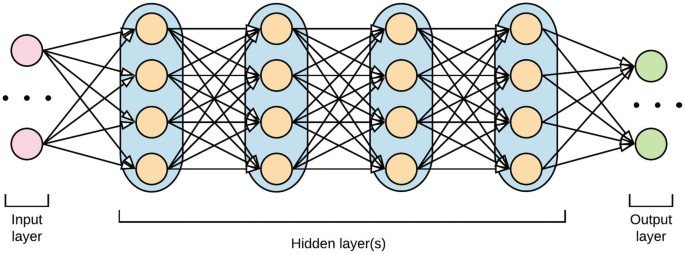

In [144]:
DISPLAY(javax.imageio.ImageIO.read(java.io.File("mlp.jpg")))

let's define a complete Multi-Layer Perceptron (MLP) class. This class will encapsulate multiple layers of neurons, where each layer feeds into the next one sequentially. The MLP class will be initialized with a list of integers specifying the number of neurons in each layer. Here's the complete implementation:

In [145]:
class MLP(inputs: Int, outputs: List<Int>) {
    val layers: List<Layer> = outputs.indices.map { i ->
        val layerSizes = listOf(inputs).plus(outputs)
        Layer(layerSizes[i], layerSizes[i + 1])
    }

    operator fun invoke(x: List<Value>): List<Value> {

        var tmpValues = x

        layers.forEach {
            tmpValues = it(tmpValues)
        }
        return tmpValues
    }

    fun parameters(): List<Value> {
        return layers.flatMap { it.parameters() }
    }

    fun zeroGrad() {
        parameters().forEach {
            it.grad = 0.0
        }
    }
}

The MLP class takes two parameters: `inputs`, an integer representing the number of input features, and `outputs`, a list of integers where each value in the list represents the number of neurons in each respective layer of the neural network.

Within the constructor of the `MLP` class, we initialize the layers of the neural network. The `layerSizes` list is created by concatenating the inputs value with the outputs list. This helps in defining the sizes of each layer. For each index `i` in the outputs list, we create a Layer object. Each Layer is initialized with the number of neurons specified by layerSizes[i] and layerSizes[i + 1], representing the number of input and output neurons for that layer, respectively. The layers are stored in the layers list.

The invoke function, defined by the `operator fun invoke(x: List<Value>)`, allows the class to be called as a function. This function takes an input x, which is a list of `Value` objects. It iterates through each layer in the network, passing the output of the previous layer as the input to the next layer. This process is known as the forward pass. The final output of the last layer is returned as the result of the network's computation.

The `parameters` function collects all the parameters (weights and biases) of the network by flattening the parameter lists from each layer into a single list.

The `zeroGrad` function sets the gradient of each parameter to zero. This is an essential step in the training process, as it clears the accumulated gradients from previous iterations before computing the new gradients during backpropagation, we will use this method later.

Now we will use our MLP class with an example.

In [146]:
val x = listOf(Value(2.0), Value(3.0), Value(-1.0))
val n = MLP(3, listOf(4, 4, 1))
val out = n(x)

In [147]:
out

[Value(data=0.39263135798022397)]

If we plot `out` then we will see the massive computational graph created with the MLP.

In [148]:
out[0].plot()

<!-- 79563362 -->
 
 79563362 
 
 data:  0.39263135798022397 
 
 grad:  0.0 
 
<!-- 79563362tanh -->
 
 79563362tanh 
 
 tanh 
 
<!-- 79563362tanh->79563362 -->
 
 79563362tanh->79563362 
 
 
 
<!-- 1466104993 -->
 
 1466104993 
 
 data:  0.4149071875637066 
 
 grad:  0.0 
 
<!-- 1466104993->79563362tanh -->
 
 1466104993->79563362tanh 
 
 
 
<!-- 1466104993+ -->
 
 1466104993+ 
 
 + 
 
<!-- 1466104993+->1466104993 -->
 
 1466104993+->1466104993 
 
 
 
<!-- 1827885748 -->
 
 1827885748 
 
 data:  -0.23359428031167026 
 
 grad:  0.0 
 
<!-- 1827885748->1466104993+ -->
 
 1827885748->1466104993+ 
 
 
 
<!-- 1827885748+ -->
 
 1827885748+ 
 
 + 
 
<!-- 1827885748+->1827885748 -->
 
 1827885748+->1827885748 
 
 
 
<!-- 1760164738 -->
 
 1760164738 
 
 data:  -0.4496557348352686 
 
 grad:  0.0 
 
<!-- 1760164738->1827885748+ -->
 
 1760164738->1827885748+ 
 
 
 
<!-- 1760164738+ -->
 
 1760164738+ 
 
 + 
 
<!-- 1760164738+->1760164738 -->
 
 1760164738+->1760164738 
 
 
 
<!-- 485491175 -->
 
 485491175 
 
 data:  -0.13065647857411483 
 
 grad:  0.0 
 
<!-- 485491175->1760164738+ -->
 
 485491175->1760164738+ 
 
 
 
<!-- 485491175+ -->
 
 485491175+ 
 
 + 
 
<!-- 485491175+->485491175 -->
 
 485491175+->485491175 
 
 
 
<!-- 1555521836 -->
 
 1555521836 
 
 data:  0.27325749840734476 
 
 grad:  0.0 
 
<!-- 1555521836->485491175+ -->
 
 1555521836->485491175+ 
 
 
 
<!-- 1555521836* -->
 
 1555521836* 
 
 * 
 
<!-- 1555521836*->1555521836 -->
 
 1555521836*->1555521836 
 
 
 
<!-- 715652860 -->
 
 715652860 
 
 MLP-Weight 
 
 data:  0.8018069661522524 
 
 grad:  0.0 
 
<!-- 715652860->1555521836* -->
 
 715652860->1555521836* 
 
 
 
<!-- 229975489 -->
 
 229975489 
 
 data:  0.3408021006834915 
 
 grad:  0.0 
 
<!-- 229975489->1555521836* -->
 
 229975489->1555521836* 
 
 
 
<!-- 229975489tanh -->
 
 229975489tanh 
 
 tanh 
 
<!-- 229975489tanh->229975489 -->
 
 229975489tanh->229975489 
 
 
 
<!-- 290906793 -->
 
 290906793 
 
 data:  0.35499975229587477 
 
 grad:  0.0 
 
<!-- 290906793->229975489tanh -->
 
 290906793->229975489tanh 
 
 
 
<!-- 290906793+ -->
 
 290906793+ 
 
 + 
 
<!-- 290906793+->290906793 -->
 
 290906793+->290906793 
 
 
 
<!-- 1980719022 -->
 
 1980719022 
 
 data:  0.8676704741076755 
 
 grad:  0.0 
 
<!-- 1980719022->290906793+ -->
 
 1980719022->290906793+ 
 
 
 
<!-- 1980719022+ -->
 
 1980719022+ 
 
 + 
 
<!-- 1980719022+->1980719022 -->
 
 1980719022+->1980719022 
 
 
 
<!-- 1665798029 -->
 
 1665798029 
 
 data:  0.6406904925830059 
 
 grad:  0.0 
 
<!-- 1665798029->1980719022+ -->
 
 1665798029->1980719022+ 
 
 
 
<!-- 1665798029+ -->
 
 1665798029+ 
 
 + 
 
<!-- 1665798029+->1665798029 -->
 
 1665798029+->1665798029 
 
 
 
<!-- 1198892296 -->
 
 1198892296 
 
 data:  0.03877771728534679 
 
 grad:  0.0 
 
<!-- 1198892296->1665798029+ -->
 
 1198892296->1665798029+ 
 
 
 
<!-- 1198892296+ -->
 
 1198892296+ 
 
 + 
 
<!-- 1198892296+->1198892296 -->
 
 1198892296+->1198892296 
 
 
 
<!-- 1636844773 -->
 
 1636844773 
 
 data:  -0.22671477130818984 
 
 grad:  0.0 
 
<!-- 1636844773->1198892296+ -->
 
 1636844773->1198892296+ 
 
 
 
<!-- 1636844773* -->
 
 1636844773* 
 
 * 
 
<!-- 1636844773*->1636844773 -->
 
 1636844773*->1636844773 
 
 
 
<!-- 1844348246 -->
 
 1844348246 
 
 MLP-Weight 
 
 data:  -0.6343187615797843 
 
 grad:  0.0 
 
<!-- 1844348246->1636844773* -->
 
 1844348246->1636844773* 
 
 
 
<!-- 1584126209 -->
 
 1584126209 
 
 data:  0.35741457614079064 
 
 grad:  0.0 
 
<!-- 1584126209->1636844773* -->
 
 1584126209->1636844773* 
 
 
 
<!-- 1868716672* -->
 
 1868716672* 
 
 * 
 
<!-- 1584126209->1868716672* -->
 
 1584126209->1868716672* 
 
 
 
<!-- 61071307* -->
 
 61071307* 
 
 * 
 
<!-- 1584126209->61071307* -->
 
 1584126209->61071307* 
 
 
 
<!-- 317916431* -->
 
 317916431* 
 
 * 
 
<!-- 1584126209->317916431* -->
 
 1584126209->317916431* 
 
 
 
<!-- 1868716672 -->
 
 1868716672 
 
 data:  -0.13537765200767032 
 
 grad:  0.0 
 
<!-- 1868716672*->1868716672 -->
 
 1868716672*->186871

In the out variable, we store the output of our neural network, which is computed by feeding input `x` into the network. The network architecture includes an initial input layer with 3 neurons, followed by two hidden layers, each with 4 neurons, and concludes with an output layer containing a single neuron.

In defining this entire MLP, we've constructed complex mathematical expressions extending from multiple layers down to a single output. While manually differentiating these expressions on paper would be impractical, with kGrad|, we can efficiently perform backpropagation through all layers, enabling us to update the weights of each neuron based on the gradients computed.

### Creating a small dataset and writing the loss function.

In this context, we're setting up a basic example dataset. It consists of four examples, each paired with a corresponding target output. The objective is for the neural network to output 1.0 for certain inputs, -1.0 for others, and 0.0 for the remaining ones, effectively creating a simple binary classifier. Initially, we're examining the neural network's predictions for these examples to see how it currently interprets them.

In [149]:
// Input simple dataset
val xs = listOf(
    listOf(Value(2.0), Value(3.0), Value(-1.0)),
    listOf(Value(3.0), Value(-1.0), Value(0.5)),
    listOf(Value(0.5), Value(1.0), Value(1.0)),
    listOf(Value(1.0), Value(1.0), Value(-1.0)),
)

//desired targets.
val ys = listOf(Value(1.0), Value(-1.0), Value(-1.0), Value(1.0)) 

In [150]:
val yPred = xs.flatMap { n(it) }
yPred

[Value(data=0.39263135798022397), Value(data=0.5691089101518404), Value(data=0.598152708888518), Value(data=0.4797484581939079)]

In [151]:
println("Expected value for input data 0: ${ys[0].data}, value received from the network ${yPred[0].data}")
println("Expected value for input data 1: ${ys[1].data}, value received from the network ${yPred[1].data}")
println("Expected value for input data 2: ${ys[2].data}, value received from the network ${yPred[2].data}")
println("Expected value for input data 3: ${ys[3].data}, value received from the network ${yPred[3].data}")

Expected value for input data 0: 1.0, value received from the network 0.39263135798022397
Expected value for input data 1: -1.0, value received from the network 0.5691089101518404
Expected value for input data 2: -1.0, value received from the network 0.598152708888518
Expected value for input data 3: 1.0, value received from the network 0.4797484581939079


Essentially, by evaluating `n(x)` for each `xs` and storing the values in `yPred`, we obtain the neural network's outputs for the four examples. The outputs are as follows: `yPred[0]`, `yPred[1]`, `yPred[2]`, and `yPred[3]`. However, our desired outputs are 1.0, -1.0, -1.0, and 1.0 respectively. Therefore, we need to adjust the neural network so that it assigns higher values to the inputs where we want an output of 1.0, and lower values to the inputs where we want an output of -1.0.

To improve the neural network's predictions and better match the desired targets, we need to fine-tune its weights. This process involves using a concept called the loss function, which quantifies the performance of the neural network by measuring the difference between the predicted outputs and the actual targets. By minimizing this loss, we can improve the neural network's performance.

In our case, we will use the Mean Squared Error (MSE) loss function. MSE is calculated by taking the average of the squares of the differences between the predicted values and the actual target values. The formula for MSE is:


$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

Where:
- $ N $ is the number of examples.
- $ y_i $ is the actual target for the $ i $-th example.
- $ \hat{y}_i $ is the predicted value for the $ i $-th example.


In [152]:
ys.zip(yPred) { y, pred -> (y - pred).pow(2.0) }

[Value(data=0.3688966673089468), Value(data=2.4621027719178965), Value(data=2.554092080927708), Value(data=0.270661666751616)]

The process described involves iterating over pairs of ground truth values and predicted values using the zip function. For each pair, the ground truth value is subtracted from the predicted value, and the result is squared. This operation produces individual loss components.

These individual losses are calculated by taking the difference between each prediction and its corresponding ground truth, and squaring this difference to ensure all loss values are positive. The squared difference results in zero if the prediction perfectly matches the ground truth, and a larger value if the prediction is far from the target.

The losses for all pairs are then summed to obtain the final loss. The goal is to minimize this final loss because a lower loss indicates that predictions are closer to their respective targets. The smallest possible loss is zero, indicating perfect predictions, while higher losses indicate poorer predictive performance.

In [153]:
val loss = ys.zip(yPred) { y, pred -> (y - pred).pow(2.0) }.reduce { a, b -> a + b }
loss

Value(data=5.655753186906168)

Now of course if we execute `loss.backward()` something magical happens

In [154]:
loss.backward()

The key point here is that in a neural network, we can access individual neurons and their properties. By navigating through the structure of the network, starting with `n.layers`, we can drill down to a specific layer and then to a specific neuron within that layer.

For instance, if we want to examine the first neuron in the first layer of a multi-layer perceptron (MLP), we would look at the layers, which are stored in a list. Each layer contains a list of neurons. By accessing the first neuron in this list, we can then inspect its properties, such as its weights. This allows us to examine and potentially modify the weights of individual neurons, giving us a detailed view over the neural network's parameters.

In [155]:
n.layers[0].neurons[0].weights[0]

Value(data=0.1864229810229887)

In [156]:
n.layers[0].neurons[0].weights[0].grad

-0.27304228561481425

The value has a gradient due to the backward pass. If the gradient of this specific weight in a particular neuron and layer is negative, increasing this weight slightly will decrease the loss. This gradient information is available for every neuron and all their parameters. It's also useful to examine the loss computation graph. Previously, we looked at the graph of a single neuron's forward pass, which was complex. Now, considering the forward pass of all examples and calculating the mean squared error loss results in an even larger and more complex graph.

In [157]:
loss.plot()

<!-- 2051289958 -->
 
 2051289958 
 
 data:  5.655753186906168 
 
 grad:  1.0 
 
<!-- 2051289958+ -->
 
 2051289958+ 
 
 + 
 
<!-- 2051289958+->2051289958 -->
 
 2051289958+->2051289958 
 
 
 
<!-- 755983564 -->
 
 755983564 
 
 data:  5.3850915201545515 
 
 grad:  1.0 
 
<!-- 755983564->2051289958+ -->
 
 755983564->2051289958+ 
 
 
 
<!-- 755983564+ -->
 
 755983564+ 
 
 + 
 
<!-- 755983564+->755983564 -->
 
 755983564+->755983564 
 
 
 
<!-- 318052105 -->
 
 318052105 
 
 data:  2.830999439226843 
 
 grad:  1.0 
 
<!-- 318052105->755983564+ -->
 
 318052105->755983564+ 
 
 
 
<!-- 318052105+ -->
 
 318052105+ 
 
 + 
 
<!-- 318052105+->318052105 -->
 
 318052105+->318052105 
 
 
 
<!-- 766446433 -->
 
 766446433 
 
 data:  0.3688966673089468 
 
 grad:  1.0 
 
<!-- 766446433->318052105+ -->
 
 766446433->318052105+ 
 
 
 
<!-- 766446433^ -->
 
 766446433^ 
 
 ^ 
 
<!-- 766446433^->766446433 -->
 
 766446433^->766446433 
 
 
 
<!-- 1990972081 -->
 
 1990972081 
 
 data:  0.607368642019776 
 
 grad:  1.214737284039552 
 
<!-- 1990972081->766446433^ -->
 
 1990972081->766446433^ 
 
 
 
<!-- 1990972081- -->
 
 1990972081- 
 
 - 
 
<!-- 1990972081-->1990972081 -->
 
 1990972081-->1990972081 
 
 
 
<!-- 550822316 -->
 
 550822316 
 
 data:  1.0 
 
 grad:  1.214737284039552 
 
<!-- 550822316->1990972081- -->
 
 550822316->1990972081- 
 
 
 
<!-- 438560736 -->
 
 438560736 
 
 data:  0.39263135798022397 
 
 grad:  -1.214737284039552 
 
<!-- 438560736->1990972081- -->
 
 438560736->1990972081- 
 
 
 
<!-- 438560736tanh -->
 
 438560736tanh 
 
 tanh 
 
<!-- 438560736tanh->438560736 -->
 
 438560736tanh->438560736 
 
 
 
<!-- 1333924806 -->
 
 1333924806 
 
 data:  0.4149071875637066 
 
 grad:  -1.0274741334976751 
 
<!-- 1333924806->438560736tanh -->
 
 1333924806->438560736tanh 
 
 
 
<!-- 1333924806+ -->
 
 1333924806+ 
 
 + 
 
<!-- 1333924806+->1333924806 -->
 
 1333924806+->1333924806 
 
 
 
<!-- 1729396445 -->
 
 1729396445 
 
 data:  -0.23359428031167026 
 
 grad:  -1.0274741334976751 
 
<!-- 1729396445->1333924806+ -->
 
 1729396445->1333924806+ 
 
 
 
<!-- 1729396445+ -->
 
 1729396445+ 
 
 + 
 
<!-- 1729396445+->1729396445 -->
 
 1729396445+->1729396445 
 
 
 
<!-- 1623865874 -->
 
 1623865874 
 
 data:  -0.4496557348352686 
 
 grad:  -1.0274741334976751 
 
<!-- 1623865874->1729396445+ -->
 
 1623865874->1729396445+ 
 
 
 
<!-- 1623865874+ -->
 
 1623865874+ 
 
 + 
 
<!-- 1623865874+->1623865874 -->
 
 1623865874+->1623865874 
 
 
 
<!-- 1708383500 -->
 
 1708383500 
 
 data:  -0.13065647857411483 
 
 grad:  -1.0274741334976751 
 
<!-- 1708383500->1623865874+ -->
 
 1708383500->1623865874+ 
 
 
 
<!-- 1708383500+ -->
 
 1708383500+ 
 
 + 
 
<!-- 1708383500+->1708383500 -->
 
 1708383500+->1708383500 
 
 
 
<!-- 982580819 -->
 
 982580819 
 
 data:  0.27325749840734476 
 
 grad:  -1.0274741334976751 
 
<!-- 982580819->1708383500+ -->
 
 982580819->1708383500+ 
 
 
 
<!-- 982580819* -->
 
 982580819* 
 
 * 
 
<!-- 982580819*->982580819 -->
 
 982580819*->982580819 
 
 
 
<!-- 715652860 -->
 
 715652860 
 
 MLP-Weight 
 
 data:  0.8018069661522524 
 
 grad:  -2.618680102024985 
 
<!-- 715652860->982580819* -->
 
 715652860->982580819* 
 
 
 
<!-- 1539535140* -->
 
 1539535140* 
 
 * 
 
<!-- 715652860->1539535140* -->
 
 715652860->1539535140* 
 
 
 
<!-- 285540400* -->
 
 285540400* 
 
 * 
 
<!-- 715652860->285540400* -->
 
 715652860->285540400* 
 
 
 
<!-- 990447906* -->
 
 990447906* 
 
 * 
 
<!-- 715652860->990447906* -->
 
 715652860->990447906* 
 
 
 
<!-- 1539535140 -->
 
 1539535140 
 
 data:  -0.4726390313175291 
 
 grad:  2.1217962934197545 
 
<!-- 1539535140*->1539535140 -->
 
 1539535140*->1539535140 
 
 
 
<!-- 1134630390+ -->
 
 1134630390+ 
 
 + 
 
<!-- 1539535140->1134630390+ -->
 
 1539535140->1134630390+ 
 
 
 
<!-- 1134630390 -->
 
 1134630390 
 
 data:  -0.06514764339796159 
 
 grad:  2.1217962934197545 
 
<!-- 1134630390+->1134630390 -->
 
 1134630390+->1134630390 
 
 
 
<!-- 1363136404+ -->
 
 1363136404+ 
 

The graph we've built is extensive because it includes four forward passes of the neural network for each example, followed by the loss calculation, resulting in a final loss. This loss will backpropagate through all the forward passes and intermediate values of the neural network, eventually reaching the weight parameters (inputs) of the network. While the input data also has gradients, they are not useful since the input data is fixed and unchangeable. However, the gradients for the neural network parameters (weights and biases) are valuable as we aim to adjust these parameters to optimize the network.

### Collecting All Neural Network Parameters







We need convenience code to gather all the neural network parameters into one array, allowing us to adjust each parameter slightly based on gradient information. We will use the `parameters` function added to the `Neuron`, `Layer`, and `MLP` classes to collect these parameters.

In [158]:
n.parameters()

[Value(data=0.1864229810229887), Value(data=0.05411003356954902), Value(data=0.30191804048088167), Value(data=0.14066065729484145), Value(data=-0.9707177854847504), Value(data=0.717381031160794), Value(data=-0.8469049406575033), Value(data=0.04381725242367174), Value(data=0.0953142484225189), Value(data=-0.032870975711024375), Value(data=0.21553517576953118), Value(data=-0.9385218173061729), Value(data=0.5877304126512057), Value(data=0.23883815623037985), Value(data=0.1972781530206711), Value(data=0.6087354290672331), Value(data=-0.6343187615797843), Value(data=0.33144633525050704), Value(data=-0.7653600667495986), Value(data=0.23155759183982383), Value(data=-0.5126707218118007), Value(data=-0.3787692529762501), Value(data=0.8433360518016475), Value(data=-0.05981072909973251), Value(data=0.9906570444136011), Value(data=-0.7360243589130617), Value(data=0.419533100243201), Value(data=-0.05943602830243222), Value(data=-0.19718249752840622), Value(data=-0.7874818384944626), Value(data=-0.4

In [159]:
n.parameters().size

41

### Manually performing gradient descent optimization to train the network.

We aim to adjust the parameters slightly based on gradient information. In gradient descent, the gradient is viewed as a vector pointing in the direction of increased loss. Therefore, we modify the parameter data by taking a small step in the opposite direction of the gradient to decrease the loss. For example, a step size of 0.01 multiplied by the gradient is used. However, we need to ensure the correct sign is applied. If a neuron's weight gradient is negative, increasing the neuron’s weight value decreases the loss, so we must add a negative sign to our update rule to ensure we move in the direction that minimizes the loss. By nudging the parameters slightly, we effectively reduce the loss. As a result of adjusting all parameters, we expect the overall loss to decrease.

In [160]:
//forward pass
val yPred = xs.flatMap { n(it) }

In [161]:
//loss computation
val loss = ys.zip(yPred) { y, pred -> (y - pred).pow(2.0) }.reduce { a, b -> a + b }

In [162]:
// set grads to zero before calling backward
n.zeroGrad()

In [163]:
//backward pass
loss.backward()

In [164]:
//update parameters
n.parameters().forEach {
    it.data += -0.1 * it.grad
}

In [165]:
loss

Value(data=5.655753186906168)

In [166]:
//forward pass
val yPred = xs.flatMap { n(it) }

In [167]:
//loss computation
val loss = ys.zip(yPred) { y, pred -> (y - pred).pow(2.0) }.reduce { a, b -> a + b }

In [168]:
// set grads to zero before calling backward
n.zeroGrad()

In [169]:
//backward pass
loss.backward()

In [170]:
//update parameters
n.parameters().forEach {
    it.data += -0.1 * it.grad
}

In [171]:
loss

Value(data=1.9089589610063795)

In [172]:
//forward pass
val yPred = xs.flatMap { n(it) }

In [173]:
//loss computation
val loss = ys.zip(yPred) { y, pred -> (y - pred).pow(2.0) }.reduce { a, b -> a + b }

In [174]:
// set grads to zero before calling backward
n.zeroGrad()

In [175]:
//backward pass
loss.backward()

In [176]:
//update parameters
n.parameters().forEach {
    it.data += -0.1 * it.grad
}

In [177]:
loss

Value(data=3.7431061948912654)

The loss decreased slightly after updating all the weights and biases of the network.


We want to re-evaluate the loss to see if it has decreased. The data definition remains unchanged, but after recalculating the forward pass of the network and comparing the new loss to the previous one, we expect the new loss to be slightly lower. Lower loss indicates that our predictions are closer to the targets. To continue optimizing, we repeat this process: forward pass, backward pass, and update. After another iteration, the loss decreases further. This iterative process, known as gradient descent, involves improving the neural network's predictions step by step. As we observe the values in `yPred`, they should approach their targets: becoming more positive or negative as needed through each iteration.

We can try a slightly higher learning rate to speed up the training process. However, it's important to note that if the learning rate is too high, we risk overstepping and causing the loss to increase dramatically or even destabilize the training process. 

The choice of learning rate is crucial in gradient descent: too low, and convergence is slow; too high, and the process becomes unstable. It's often a delicate balance to find the optimal learning rate that ensures efficient convergence without causing instability or loss explosion.

### Training the neural network using a training loop

Let's improve our approach by implementing a proper training loop. The input data remains unchanged, and we perform a forward pass in a loop over a defined number of steps. After each forward pass, we validate the loss and reinitialize the grad parameters of the network. We then execute the backward pass to compute gradients and update the network parameters using gradient descent. During iteration, we print the current step and loss to monitor progress. Choosing a learning rate of 0.01 and training to 40 steps.

In [178]:
for (i in 0 .. 50) {

    //forward pass
    val yPred = xs.flatMap { n(it) }

    //loss computation
    val loss = ys.zip(yPred) { y, pred -> (y - pred).pow(2.0) }.reduce { a, b -> a + b }

    // set grads to zero before calling backward
    n.zeroGrad()

    //backward update
    loss.backward()

    //update parameters
    n.parameters().forEach {
        it.data += -0.1 * it.grad
    }

    println("$i\t loss: ${loss.data}")
}

0	 loss: 0.1504136908672217
1	 loss: 0.10423338422140015
2	 loss: 0.08247670643291552
3	 loss: 0.06859864953011477
4	 loss: 0.05878504508609107
5	 loss: 0.05142930797207158
6	 loss: 0.04569504176296324
7	 loss: 0.04109367446103253
8	 loss: 0.0373175890976642
9	 loss: 0.034162356364651515
10	 loss: 0.03148638286892975
11	 loss: 0.02918830402735382
12	 loss: 0.027193557711023074
13	 loss: 0.02544603242435048
14	 loss: 0.023902671264828503
15	 loss: 0.02252987295564718
16	 loss: 0.021301025422024954
17	 loss: 0.0201947753225228
18	 loss: 0.01919378867910907
19	 loss: 0.01828384692109636
20	 loss: 0.01745317677271668
21	 loss: 0.016691946191192568
22	 loss: 0.01599188017667805
23	 loss: 0.015345964417921349
24	 loss: 0.014748214177908258
25	 loss: 0.014193492240514867
26	 loss: 0.013677364173209836
27	 loss: 0.013195982271267372
28	 loss: 0.012745991761294491
29	 loss: 0.012324454435648608
30	 loss: 0.011928786051115876
31	 loss: 0.011556704681455737
32	 loss: 0.011206187850928851
33	 loss

We achieved a low loss in our network, which means we anticipate highly accurate predictions for our training data. 

In [179]:
val yPred = xs.flatMap { n(it) }
println("Expected value for input data 0: ${ys[0].data}, value received from the network ${yPred[0].data}")
println("Expected value for input data 1: ${ys[1].data}, value received from the network ${yPred[1].data}")
println("Expected value for input data 2: ${ys[2].data}, value received from the network ${yPred[2].data}")
println("Expected value for input data 3: ${ys[3].data}, value received from the network ${yPred[3].data}")

Expected value for input data 0: 1.0, value received from the network 0.9617381104222498
Expected value for input data 1: -1.0, value received from the network -0.9719107275746601
Expected value for input data 2: -1.0, value received from the network -0.9506241954555594
Expected value for input data 3: 1.0, value received from the network 0.9514619640212775


It's incredible how well neural networks learn from the data! The results we're seeing are good.

### Summary


Neural networks are mathematical expressions that process data using weights and parameters. During the forward pass, they generate predictions evaluated by a loss function, which measures accuracy. Lower loss indicates better performance. Using backpropagation, gradients are computed to adjust parameters locally, iteratively minimizing loss via gradient descent. This iterative process ensures the network behaves as desired for specific tasks. Neural networks vary in complexity from small setups with dozens of parameters to vast networks with billions or trillions, solving intricate problems with emergent properties. For example, models like GPT use similar principles on a massive scale, predicting text sequences with cross-entropy loss instead of mean squared error. Despite variations, the fundamentals of neural network training remain consistent and powerful across diverse applications.